<a href="https://colab.research.google.com/github/asim5800/Deep-learning-practicals/blob/main/DS_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Description 


**Housing costs demand a significant investment from both consumers and developers. And when it comes to planning a budget—whether personal or corporate—the last thing anyone needs is uncertainty about one of their biggets expenses. Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident when they sign a lease or purchase a building.**

*Although the housing market is relatively stable in Russia, the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated. Adding an unstable economy to the mix means Sberbank and their customers need more than simple regression models in their arsenal.*

Data Description -
**The aim of this competition is to predict the sale price of each property**. The target variable is called **price_doc** in train.csv.

The training data is from August 2011 to June 2015, and the test set is from July 2015 to May 2016. The dataset also includes information about overall conditions in Russia's economy and finance sector, so you can focus on generating accurate price forecasts for individual properties, without needing to second-guess what the business cycle will do.



# Description of features train.csv and test.csv

price_doc: sale price (this is the target variable)

id: transaction id

timestamp: date of transaction

full_sq: total area in square meters, including loggias, balconies 
and other non-residential areas

life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas

floor: for apartments, floor of the building

max_floor: number of floors in the building

material: wall material

build_year: year built

num_room: number of living rooms

kitch_sq: kitchen area

state: apartment condition

product_type: owner-occupier purchase or investment

sub_area: name of the district


The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population

male_f, female_f: subarea population by gender

young_*: population younger than working age

work_*: working-age population

ekder_*: retirement-age population

n_m_{all|male|female}: population between n and m years old

build_count_*: buildings in the subarea by construction type or year

x_count_500: the number of x within 500m of the property

x_part_500: the share of x within 500m of the property

_sqm_: square meters

cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB

trc_: shopping malls

prom_: industrial zones

green_: green zones

metro_: subway

_avto_: distances by car

mkad_: Moscow Circle Auto Road

ttk_: Third Transport Ring

sadovoe_: Garden Ring

bulvar_ring_: Boulevard Ring

kremlin_: City center

zd_vokzaly_: Train station

oil_chemistry_: Dirty industry

ts_: Power plant







#*Loading Libraries & Data*

In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

#mounting drive
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:

#Loading housing Dataset
house_df= pd.read_csv('/content/drive/MyDrive/DSHW/train.csv', low_memory= False)

#Analysing & cleaning the Housing Dataset

In [5]:
house_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [6]:
#Checking Information about Dataset
house_df.shape

(30471, 292)

In [7]:
#Checking info of data as data types and rows and cols
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [8]:
#Checking Null Values
house_df.isnull().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64

In [9]:
#Summary Statastics
house_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1190.738677,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1057.015001,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341362,2.3030

In [10]:
# Creating a list of input columns
input_col=list(house_df.columns)[1:-1]
print(input_col)

['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '

In [11]:
# Creating a list of target column
target_col='price_doc'

In [12]:
inputs=house_df[input_col].copy()

In [13]:
target=house_df[target_col]

Dealing with numeric and categorical features

In [14]:
#making list of numerical columns
numeric_cols=inputs.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
#making list of categorical columns
categorical_cols=inputs.select_dtypes(include=['object']).columns.tolist()

In [16]:
#Finding null values count 
missing_counts = inputs[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts>0]

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_min_price_avg               13281
cafe_sum_500_max_price_avg               13281
cafe_avg_price_500                       13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
cafe_avg_price_1000                       6524
life_sq                                   6383
build_count_1946-1970                     4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_slag                          4991
build_count_frame                         4991
build_count_m

We have 51 columns with null values in the dataset.

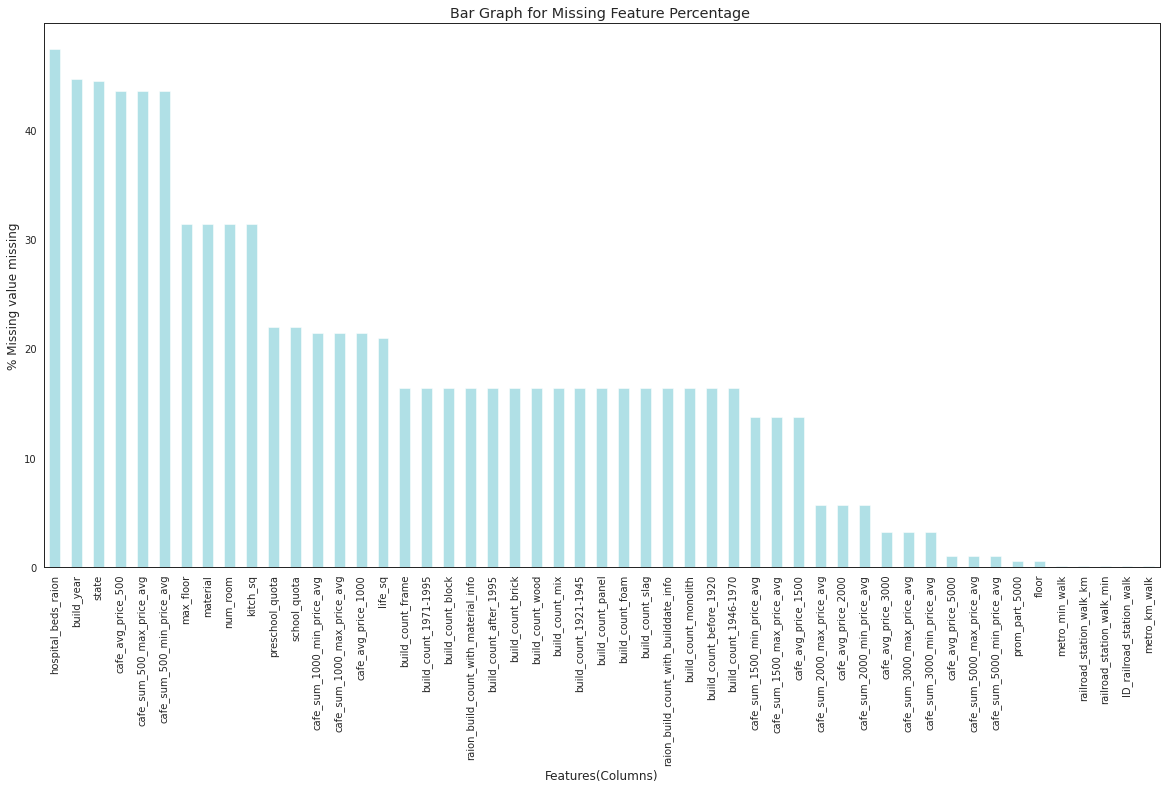

In [17]:
# Plot all the Missing Values in Decending Order
%matplotlib inline
missing_values = ((house_df.isna().sum())/house_df.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values = missing_values.drop(missing_values[missing_values == 0].index)

color=['powderblue']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = color)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

***Since this is a huge dimensional data so instead of performing PCA I'm selecting the most relevent features and creating new data set (manual observation).***

In [18]:
print(house_df.columns.tolist())

['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_ma

In [19]:
new_df= house_df[['id','timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'metro_km_avto', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km',  'cemetery_km', 'railroad_station_walk_km',    'public_transport_station_km',  'water_km',  'big_road1_km',  'big_road2_km',  'railroad_km',  'bus_terminal_avto_km',  'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'big_market_km', 'market_shop_km', 'fitness_km',  'stadium_km', 'public_healthcare_km', 'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',  'big_church_km', 'theater_km', 'exhibition_km','price_doc' ]]

In [20]:
new_df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,metro_km_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,public_transport_station_km,water_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,big_market_km,market_shop_km,fitness_km,stadium_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,big_church_km,theater_km,exhibition_km,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,1.804127,5.419893,0.274985,0.992631,1.422391,3.830951,1.305159,24.292406,5.718519,1.210027,1.062513,10.814172,1.676258,0.485841,8.148591,0.974743,6.715026,0.884350,0.648488,0.637189,0.625783,14.053047,7.023705,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.647337,0.147754,0.273345,0.550690,0.065321,0.966479,4.655004,3.411993,0.065263,0.698081,2.887377,3.103996,0.694536,5.706113,3.489954,2.724295,1.246149,6.910568,3.424716,0.668364,6.127073,1.477723,1.852560,0.686252,0.519311,0.688796,0.967821,6.829889,2.358840,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,1.637996,0.049102,0.158072,0.374848,0.453172,0.939275,3.381083,1.277658,0.328756,0.468265,0.647250,2.927487,0.700691,6.710302,7.506612,0.772216,1.602183,5.752368,1.375443,0.733101,0.767569,0.097144,0.841254,1.510089,1.486533,1.543049,3.178751,4.273200,4.958214,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.984537,0.179441,0.236455,0.078090,0.106125,0.451173,2.017080,4.291432,0.131597,1.200336,2.677824,2.780449,1.999265,6.734618,9.522538,6.348716,1.767612,27.892717,0.811275,0.623484,7.385521,2.163735,10.903161,0.622272,0.599914,0.934273,1.031777,16.990677,5.029696,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.876620,0.247901,0.376838,0.258289,0.236214,0.392871,2.936581,0.853960,0.071480,0.820294,1.721834,3.133531,0.084113,1.423428,8.671016,1.638318,3.632640,9.155057,1.969738,0.220288,3.610754,1.121703,0.991683,0.892668,0.429052,0.077901,0.378756,1.112486,1.339652,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nizhegorodskoe,7.506452e+06,43795,1.593246,0.145955,0.113466,1.073495,1.497903,0.256487,0.780330,0.375312,0.189227,0.612447,0.284868,1.478529,0.244670,6.682089,8.757686,0.193127,2.341562,5.374564,3.447864,0.810413,4.233095,1.698724,3.830021,1.042262,0.440707,0.422358,0.686932,3.388810,2.553424,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Sokol'niki,1.032047e+07,57405,1.026916,0.501166,0.516979,2.393239,0.632445,0.707268,1.371596,2.603671,0.050211,0.399865,2.026623,3.657904,0.464015,4.062549,11.807532,2.106487,1.298840,13.704968,1.825870,0.132256,1.877747,0.868404,3.168782,0.544312,0.513689,0.067725,0.822377,0.752223,3.373343,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,1.593203,0.134365,0.581511,1.602056,0.165124,1.166992,1.131798,4.309575,0.254814,0.567006,1.042290,3.303552,1.964851,23.391669,5.332926,1.149883,0.952975,9.913435,2.795148,0.342545,8.114016,0.746260,6.917527,1.098572,0.657587,0.872231,1.079769,13.152310,7.718967,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Koptevo,4.787424e+06,96959,1.338707,0.112905,0.256589,0.939584,0.148957,0.670432,1.759887,1.540958,0.219776,0.322955,2.438125,2.725991,0.833580,8.571926,1.652275,2.679181,1.307363,18.180340,1.263584,0.000000,0.731142,1.032524,1.204220,0.256589,2.332388,1.143674,0.554880,6.788241,2.449453,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kuncevo,5.235177e+07,142462,0.396275,0.309673,0.150686,1.969774,0.191191,2.024971,2.79

In [21]:
#Checking Information about Dataset
new_df.shape

(30471, 45)

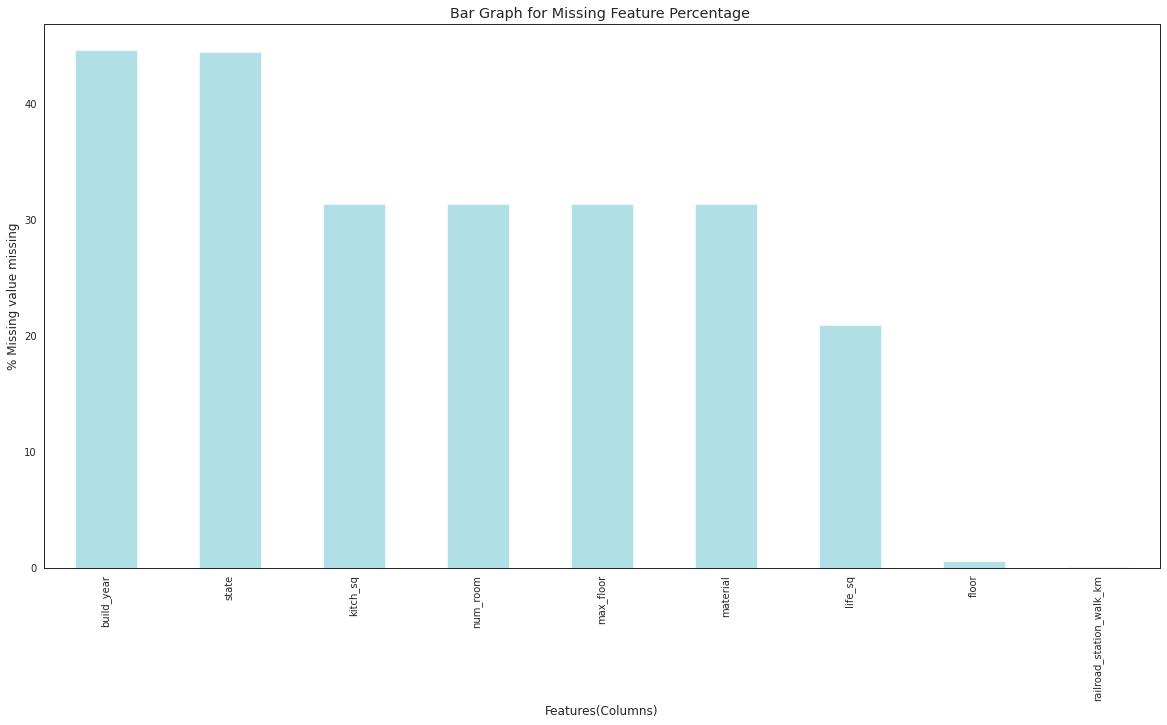

In [22]:
# Plot all the Missing Values in Decending Order
%matplotlib inline
new_missing_values = ((new_df.isna().sum())/new_df.shape[0])*100

new_missing_values.sort_values(ascending=False,inplace = True)
new_missing_values = new_missing_values.drop(new_missing_values[new_missing_values == 0].index)

color=['powderblue']

plt.figure(figsize=(20,10))
new_missing_values.plot.bar(color = color)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

Now out of 45 columns we have only 9 columns with null values. 

In [23]:
#dropping build year as its value is huge and sort of irrelavent
new_df.drop(['build_year'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
#Extracting only numerical column from datafram
numeric_colmns=new_df.select_dtypes(include=['int64','float64']).columns.tolist()

categorical_colmns=new_df.select_dtypes(include=['object']).columns.tolist()

In [25]:

final_df=new_df.fillna(new_df.mean())

In [26]:

#final check whether we have any false value in our dataframe 
final_df.isnull().values.any()

False

In [27]:
#checking datframe after imputing null values with mean
final_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,metro_km_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,public_transport_station_km,water_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,big_market_km,market_shop_km,fitness_km,stadium_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,big_church_km,theater_km,exhibition_km,price_doc
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,1.804127,5.419893,0.274985,0.992631,1.422391,3.830951,1.305159,24.292406,5.718519,1.210027,1.062513,10.814172,1.676258,0.485841,8.148591,0.974743,6.715026,0.884350,0.648488,0.637189,0.625783,14.053047,7.023705,5850000
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.647337,0.147754,0.273345,0.550690,0.065321,0.966479,4.655004,3.411993,0.065263,0.698081,2.887377,3.103996,0.694536,5.706113,3.489954,2.724295,1.246149,6.910568,3.424716,0.668364,6.127073,1.477723,1.852560,0.686252,0.519311,0.688796,0.967821,6.829889,2.358840,6000000
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,1.637996,0.049102,0.158072,0.374848,0.453172,0.939275,3.381083,1.277658,0.328756,0.468265,0.647250,2.927487,0.700691,6.710302,7.506612,0.772216,1.602183,5.752368,1.375443,0.733101,0.767569,0.097144,0.841254,1.510089,1.486533,1.543049,3.178751,4.273200,4.958214,5700000
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.984537,0.179441,0.236455,0.078090,0.106125,0.451173,2.017080,4.291432,0.131597,1.200336,2.677824,2.780449,1.999265,6.734618,9.522538,6.348716,1.767612,27.892717,0.811275,0.623484,7.385521,2.163735,10.903161,0.622272,0.599914,0.934273,1.031777,16.990677,5.029696,13100000
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.876620,0.247901,0.376838,0.258289,0.236214,0.392871,2.936581,0.853960,0.071480,0.820294,1.721834,3.133531,0.084113,1.423428,8.671016,1.638318,3.632640,9.155057,1.969738,0.220288,3.610754,1.121703,0.991683,0.892668,0.429052,0.077901,0.378756,1.112486,1.339652,16331452


In [28]:
#statistical description of dataset
final_df.describe()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,public_transport_station_km,water_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,big_market_km,market_shop_km,fitness_km,stadium_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,big_church_km,theater_km,exhibition_km,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,3.701464,0.981684,1.323956,3.099942,0.300511,0.768831,2.314765,4.386945,0.414136,0.690947,1.881276,3.396649,1.889380,9.992447,10.945350,4.410781,3.492231,13.283916,3.958882,1.154586,9.436658,3.356771,6.855891,3.926702,1.505808,2.010973,2.330047,9.638074,5.552256,7.123035e+06
std,8796.501536,38.031487,46.487729,5.305390,5.595529,1.226638,0.705433,23.408855,0.655698,2.064961e+07,57871.285899,5.808432,2.121956,3.058145,3.965363,0.298402,0.717953,1.451071,3.834784,1.272488,0.434919,1.297188,1.871334,1.972818,7.332000,7.249756,5.595367,4.552470,8.497170,3.447536,1.541425,7.642037,4.341804,6.731484,4.907562,2.253759,2.306446,2.986937,7.112284,5.304206,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000470,0.000000,0.003737,0.000000,0.000000,0.000000,0.028153,0.002804,0.006707,0.000364,0.001935,0.002299,0.062026,0.309811,0.004663,0.030266,0.661366,0.003847,0.000000,0.114746,0.000000,0.000313,0.000000,0.000000,0.000000,0.004072,0.026788,0.008949,1.000000e+05
25%,7620.500000,38.000000,22.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,7.307411e+06,21819.000000,1.036568,0.199946,0.269716,0.973297,0.100951,0.288289,1.334801,1.932103,0.101312,0.339637,0.779029,2.103387,0.655010,5.213745,5.237792,1.231846,0.976235,7.529625,1.543631,0.361170,4.018205,1.279126,2.201193,1.016728,0.483758,0.555231,0.860469,4.225254,2.243788,4.740002e+06
50%,15238.000000,49.000000,34.403271,7.000000,12.558974,1.827121,1.909804,6.399301,2.107025,1.050803e+07,83502.000000,1.783625,0.353762,0.474862,1.803889,0.214336,0.576464,1.968520,3.235540,0.160275,0.621221,1.724121,3.211969,1.238357,7.454447,8.965299,2.435160,1.895715,11.910442,2.927417,0.656267,6.969247,2.341579,4.337579,2.031685,0.839647,1.052999,1.490794,8.612007,4.106649,6.274411e+06
75%,22855.500000,63.000000,38.000000,11.000000,16.000000,1.827121,2.000000,8.000000,2.107025,1.803644e+07,122862.000000,3.776836,0.971417,0.886531,3.404787,0.415498,1.041085,3.089480,5.147642,0.278403,0.963865,2.806196,4.316292,2.520431,13.283909,16.372510,4.687054,4.926551,16.560167,5.485423,1.333994,13.591774,3.983903,9.380269,5.415663,1.549517,3.046687,2.922264,13.459593,6.968701,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,19.000000,2014.000000,33.000000,2.060718e+08,247469.000000,74.905763,29.085774,47.394706,47.351538,1.982448,14.048162,15.778710,24.653041,17.413002,2.827709,6.995416,13.798346,17.387119,74.796111,64.256957,53.890157,43.324371,59.501648,41.103651,26.652505,83.398514,76.055135,84.862148,55.278225,26.259543,18.958933,45.669060,87.600690,54.431244,1.111111e+08


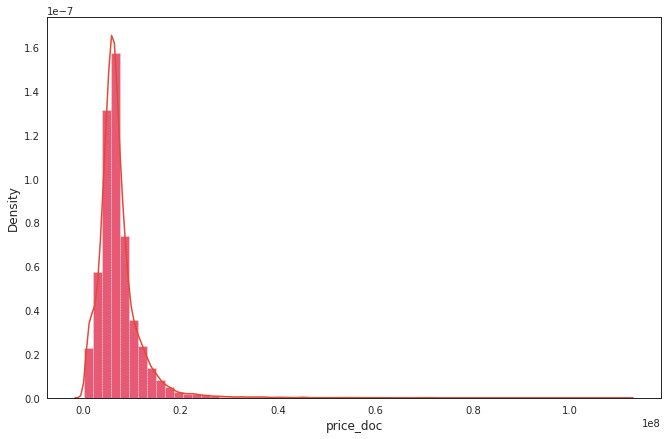

In [29]:
#price distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(final_df["price_doc"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60);

In [30]:
#since price is right skewed let's check the values specifically for this attribute
final_df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

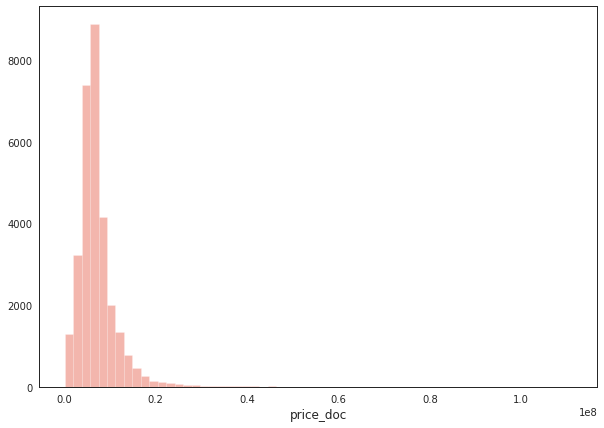

In [31]:
#distribution of number of houses w.r.t to price  
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.distplot(new_df['price_doc'], kde = False,bins=60);

In [32]:
#Max Price details
final_df[final_df.price_doc==final_df.price_doc.max()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,metro_km_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,public_transport_station_km,water_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,big_market_km,market_shop_km,fitness_km,stadium_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,big_church_km,theater_km,exhibition_km,price_doc
2118,2121,2012-05-10,55,31.0,12.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Teplyj Stan,8392316.21,130396,0.707214,0.134725,0.432346,0.680753,0.197776,1.881615,2.033207,8.01281,0.20342,0.557242,0.096272,0.754911,3.838188,6.986306,9.142377,0.153565,2.375648,4.043604,4.238845,0.989694,2.548873,3.855742,1.65519,2.757239,0.496593,1.239758,1.350731,2.26296,3.280401,111111112


Selling price of house in Sub Area TeplyjStan is highest lets check out whether the selling prices of other houses too in this sub area is high or not.

In [33]:
#description of Teplyj Stan (a moscow metro area)
final_df.price_doc[final_df.sub_area == 'Teplyj Stan'].describe()

count    1.650000e+02
mean     8.563558e+06
std      8.877605e+06
min      9.900000e+05
25%      6.200000e+06
50%      7.800000e+06
75%      1.000000e+07
max      1.111111e+08
Name: price_doc, dtype: float64

So on an avg we have price as 7.12*10^6 but in the Teplyj Stan(moscow metro area) avg price is 8.5*10^6.

In [34]:
#creating copy of dataframe
df2 = final_df.copy()

In [35]:
df2.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area',
       'area_m', 'raion_popul', 'metro_km_avto', 'kindergarten_km',
       'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'public_transport_station_km', 'water_km',
       'big_road1_km', 'big_road2_km', 'railroad_km', 'bus_terminal_avto_km',
       'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km',
       'big_market_km', 'market_shop_km', 'fitness_km', 'stadium_km',
       'public_healthcare_km', 'university_km', 'workplaces_km',
       'shopping_centers_km', 'office_km', 'big_church_km', 'theater_km',
       'exhibition_km', 'price_doc'],
      dtype='object')

I cant simply apply coorealation method of feature selection on my dataframe I need to split into X AND y otherwise it'll also include output variable "price_doc' 

In [36]:
#defining method to remove coorelated feature greater than the threshold value
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [37]:
#splitting data into X and y
X=df2.drop('price_doc',axis=1)
y= df2['price_doc']

In [38]:
#checking X head
X.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,metro_km_avto,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,public_transport_station_km,water_km,big_road1_km,big_road2_km,railroad_km,bus_terminal_avto_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,big_market_km,market_shop_km,fitness_km,stadium_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,big_church_km,theater_km,exhibition_km
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,1.804127,5.419893,0.274985,0.992631,1.422391,3.830951,1.305159,24.292406,5.718519,1.210027,1.062513,10.814172,1.676258,0.485841,8.148591,0.974743,6.715026,0.884350,0.648488,0.637189,0.625783,14.053047,7.023705
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.647337,0.147754,0.273345,0.550690,0.065321,0.966479,4.655004,3.411993,0.065263,0.698081,2.887377,3.103996,0.694536,5.706113,3.489954,2.724295,1.246149,6.910568,3.424716,0.668364,6.127073,1.477723,1.852560,0.686252,0.519311,0.688796,0.967821,6.829889,2.358840
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,1.637996,0.049102,0.158072,0.374848,0.453172,0.939275,3.381083,1.277658,0.328756,0.468265,0.647250,2.927487,0.700691,6.710302,7.506612,0.772216,1.602183,5.752368,1.375443,0.733101,0.767569,0.097144,0.841254,1.510089,1.486533,1.543049,3.178751,4.273200,4.958214
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.984537,0.179441,0.236455,0.078090,0.106125,0.451173,2.017080,4.291432,0.131597,1.200336,2.677824,2.780449,1.999265,6.734618,9.522538,6.348716,1.767612,27.892717,0.811275,0.623484,7.385521,2.163735,10.903161,0.622272,0.599914,0.934273,1.031777,16.990677,5.029696
4,5,2011-09-05,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.876620,0.247901,0.376838,0.258289,0.236214,0.392871,2.936581,0.853960,0.071480,0.820294,1.721834,3.133531,0.084113,1.423428,8.671016,1.638318,3.632640,9.155057,1.969738,0.220288,3.610754,1.121703,0.991683,0.892668,0.429052,0.077901,0.378756,1.112486,1.339652


In [39]:

#creating training and testing data by keeping ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [40]:
#removing those feature having correlation greater than 80%
uncorrelated_factors = trimm_correlated(X, 0.80)
uncorrelated_factors.shape

(30471, 25)

In [41]:
#checking shape of our original dataset
X.shape

(30471, 43)

In [42]:
print('number of features removed based on correltaion is', 43-25)

number of features removed based on correltaion is 18


In [43]:
#selecting columns that are not correlated
uncorrelated_factors.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'metro_km_avto', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'university_km'],
      dtype='object')

In [44]:
#selecting list of columns after removing correlated features
columns= ['id','timestamp' ,'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'metro_km_avto', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'university_km','price_doc']

In [45]:
#creating a dataframe with columns list after removing corelated features greater than 0.8
sol_df=df2[columns]

In [46]:
#checking dataframe 
sol_df.head(4)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc
0,1,2011-08-20,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6.407578e+06,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000
1,2,2011-08-23,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9.589337e+06,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000
2,3,2011-08-27,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.808270e+06,101708,1.637996,0.453172,0.939275,3.381083,1.277658,0.468265,0.647250,2.927487,6.710302,7.506612,5.752368,1.375443,0.733101,0.841254,5700000
3,4,2011-09-01,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,1.258354e+07,178473,0.984537,0.106125,0.451173,2.017080,4.291432,1.200336,2.677824,2.780449,6.734618,9.522538,27.892717,0.811275,0.623484,10.903161,13100000


In [47]:
#creating a copy for working dataframe
df_working= sol_df.copy()

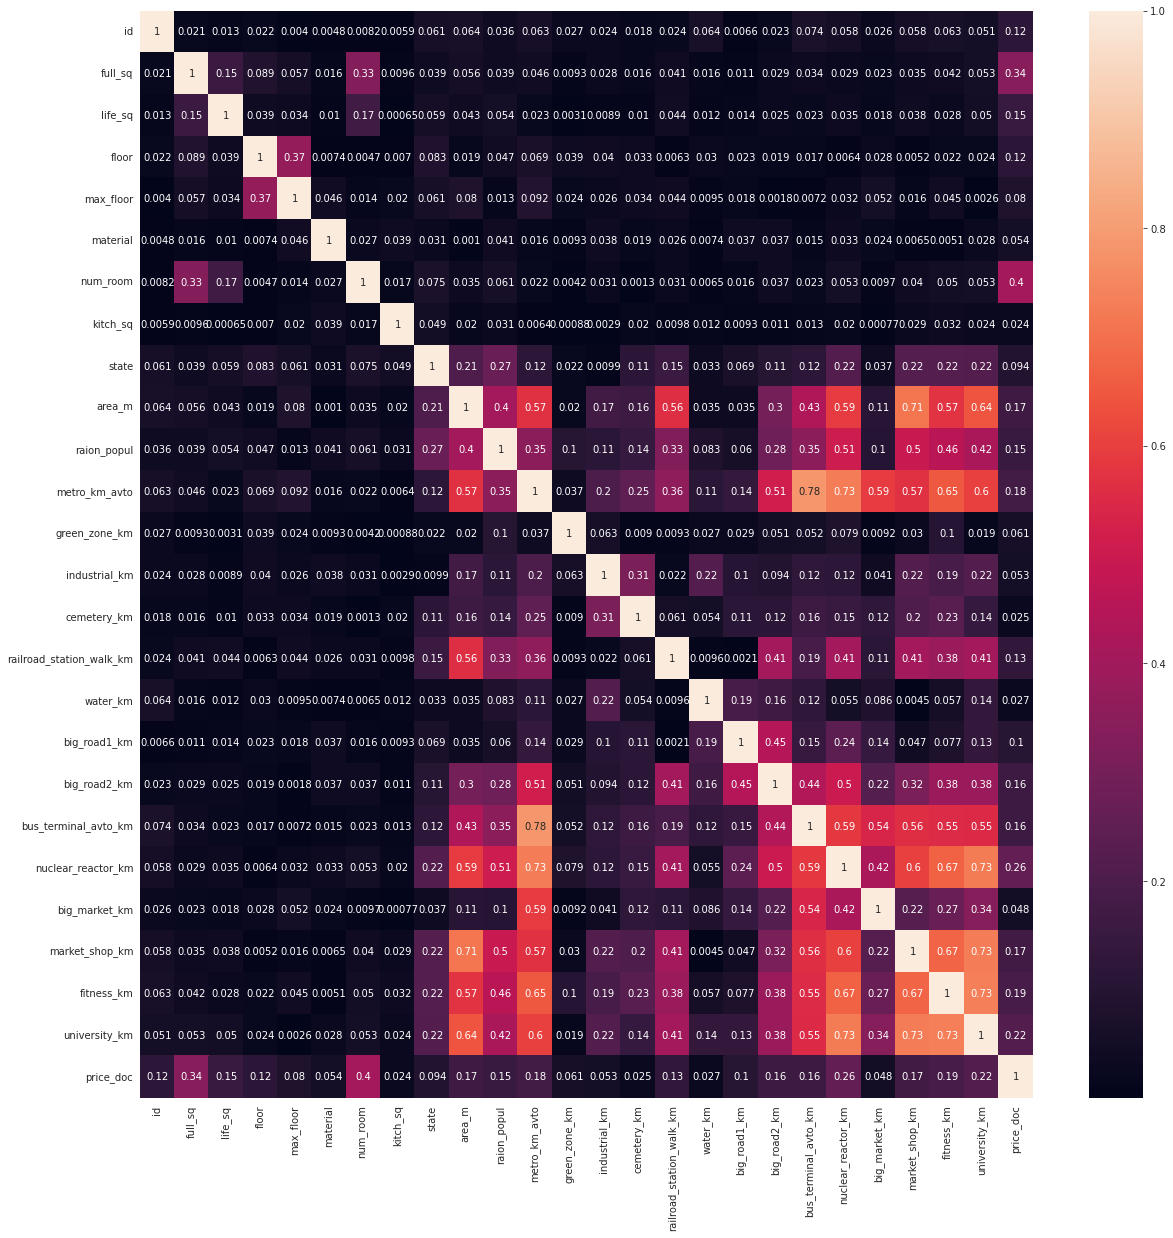

In [48]:
#plotting correlation heatmap for to get more clear picture of correlation
plt.subplots(figsize=(20,20))
sns.heatmap(df_working.corr().abs(), annot=True);

In [49]:
#Visualize the  rice over time(year)
eda_data= df_working
#extracting year,month,week from date attribute
eda_data['Year'] = pd.DatetimeIndex(eda_data['timestamp']).year
eda_data['Month'] = pd.DatetimeIndex(eda_data['timestamp']).month
#dropping date feature 
eda_data.drop(['timestamp'], axis=1,inplace= True)


In [50]:
#cheking observations after removing timestamp
eda_data.head(2)

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.100,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9589336.912,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,2011,8


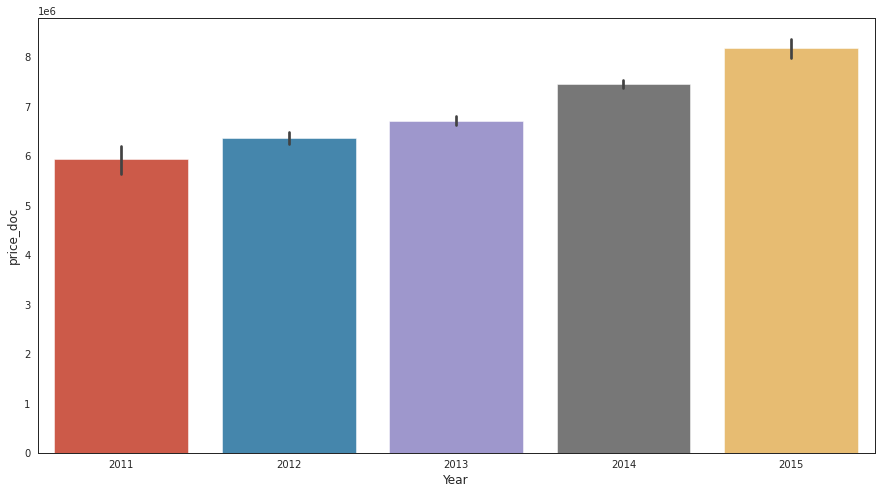

In [51]:
#plotting yearly vs sales trend
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y='price_doc',data=eda_data );

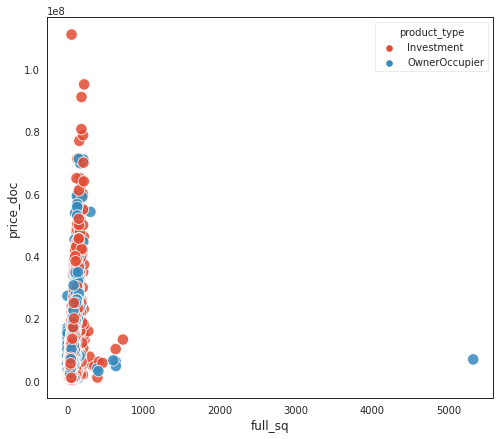

In [52]:
#plotting data with respect to price and area on our raw dataset
plt.subplots(figsize=(8,7))
sns.scatterplot(x="full_sq", y="price_doc", hue="product_type", data=house_df,x_bins=50,y_bins=50,alpha=0.85, s=130 );

In [53]:
eda_data.describe()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,3.701464,0.300511,0.768831,2.314765,4.386945,0.690947,1.881276,3.396649,9.992447,10.945350,13.283916,3.958882,1.154586,6.855891,7.123035e+06,2013.452726,6.749237
std,8796.501536,38.031487,46.487729,5.305390,5.595529,1.226638,0.705433,23.408855,0.655698,2.064961e+07,57871.285899,5.808432,0.298402,0.717953,1.451071,3.834784,0.434919,1.297188,1.871334,7.332000,7.249756,8.497170,3.447536,1.541425,6.731484,4.780111e+06,0.962433,3.518748
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,0.000000,0.028153,0.006707,0.000364,0.001935,0.062026,0.309811,0.661366,0.003847,0.000000,0.000313,1.000000e+05,2011.000000,1.000000
25%,7620.500000,38.000000,22.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,7.307411e+06,21819.000000,1.036568,0.100951,0.288289,1.334801,1.932103,0.339637,0.779029,2.103387,5.213745,5.237792,7.529625,1.543631,0.361170,2.201193,4.740002e+06,2013.000000,4.000000
50%,15238.000000,49.000000,34.403271,7.000000,12.558974,1.827121,1.909804,6.399301,2.107025,1.050803e+07,83502.000000,1.783625,0.214336,0.576464,1.968520,3.235540,0.621221,1.724121,3.211969,7.454447,8.965299,11.910442,2.927417,0.656267,4.337579,6.274411e+06,2014.000000,6.000000
75%,22855.500000,63.000000,38.000000,11.000000,16.000000,1.827121,2.000000,8.000000,2.107025,1.803644e+07,122862.000000,3.776836,0.415498,1.041085,3.089480,5.147642,0.963865,2.806196,4.316292,13.283909,16.372510,16.560167,5.485423,1.333994,9.380269,8.300000e+06,2014.000000,10.000000
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,19.000000,2014.000000,33.000000,2.060718e+08,247469.000000,74.905763,1.982448,14.048162,15.778710,24.653041,2.827709,6.995416,13.798346,74.796111,64.256957,59.501648,41.103651,26.652505,84.862148,1.111111e+08,2015.000000,12.000000


In [54]:
eda_df6=eda_data.copy()
eda_df6.drop(['Month','Year'], axis=1, inplace=True)  #removing month and year before fixing all outliers at once
#removing outliers
from scipy import stats
data=eda_df6[(np.abs(stats.zscore(eda_df6)) < 3).all(axis=1)] # storing in new dataframe

In [55]:
data.shape #new dataframe after outlier treatment (removing more than 3 standard deviation away)

(25940, 26)

Description:

For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.

It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.

all(axis=1) ensures that for each row, all column satisfy the constraint.

Finally, the result of this condition is used to index the dataframe.

In [56]:
data.describe() #statistical description of new dataframe

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc
count,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04
mean,14958.361642,51.820856,32.705119,7.514553,12.505084,1.708433,1.893172,6.047546,2.140347,1.550848e+07,90497.122089,2.403846,0.264504,0.742659,2.240484,3.922672,0.703709,1.798218,3.100503,8.792231,9.635642,12.012250,3.678187,0.905426,6.160929,6.883499e+06
std,8794.350910,17.617397,14.136351,4.997221,5.031102,1.031583,0.657839,3.448877,0.605869,1.533338e+07,57423.721417,2.201557,0.209302,0.607571,1.289134,2.890041,0.424983,1.229415,1.523047,5.246382,5.607462,6.237397,2.737260,0.894725,5.191948,3.378903e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,0.000000,0.028153,0.006707,0.000364,0.001935,0.062026,0.309811,0.661366,0.021565,0.000000,0.000313,1.000000e+05
25%,7347.750000,38.000000,21.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,6.982964e+06,48439.000000,1.036568,0.097467,0.288289,1.321574,1.923495,0.360332,0.763087,2.016444,4.888661,4.968863,7.156273,1.465453,0.345548,2.180440,4.903165e+06
50%,14861.500000,47.000000,33.000000,6.000000,12.558974,1.827121,1.909804,6.399301,2.107025,9.946335e+06,89467.000000,1.706025,0.211061,0.567253,1.939709,3.159893,0.647417,1.656134,2.969987,7.267628,8.115323,11.285483,2.787072,0.605940,4.033320,6.332358e+06
75%,22579.250000,62.000000,37.000000,11.000000,16.000000,1.827121,2.000000,8.000000,2.107025,1.752651e+07,125111.000000,2.713493,0.388691,1.030432,2.931792,4.888605,0.997840,2.609818,4.065817,12.073002,15.175759,16.023491,5.439734,1.078480,8.997366,8.300000e+06
max,30473.000000,167.000000,167.000000,23.000000,29.000000,5.000000,4.000000,75.000000,4.000000,6.677245e+07,247469.000000,14.858522,1.194948,2.892170,5.932566,15.847985,1.994338,5.754566,8.660218,24.383071,23.606740,31.829776,14.300333,5.772323,26.779862,2.140000e+07


In [57]:
eda_data.shape #shape of dataframe before outlier treatment excluding month and year

(30471, 28)

In [58]:
#merging dataframe before and after outlier treatment on id attribute
df = pd.merge(data, eda_data,on='id')

In [59]:
#checking new dataframe
df.head()

,id,full_sq_x,life_sq_x,floor_x,max_floor_x,material_x,num_room_x,kitch_sq_x,state_x,area_m_x,raion_popul_x,metro_km_avto_x,green_zone_km_x,industrial_km_x,cemetery_km_x,railroad_station_walk_km_x,water_km_x,big_road1_km_x,big_road2_km_x,bus_terminal_avto_km_x,nuclear_reactor_km_x,big_market_km_x,market_shop_km_x,fitness_km_x,university_km_x,price_doc_x,full_sq_y,life_sq_y,floor_y,max_floor_y,material_y,num_room_y,kitch_sq_y,state_y,area_m_y,raion_popul_y,metro_km_avto_y,green_zone_km_y,industrial_km_y,cemetery_km_y,railroad_station_walk_km_y,water_km_y,big_road1_km_y,big_road2_km_y,bus_terminal_avto_km_y,nuclear_reactor_km_y,big_market_km_y,market_shop_km_y,fitness_km_y,university_km_y,price_doc_y,Year,Month
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6.407578e+06,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6.407578e+06,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9.589337e+06,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9.589337e+06,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,2011,8
2,3,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.808270e+06,101708,1.637996,0.453172,0.939275,3.381083,1.277658,0.468265,0.647250,2.927487,6.710302,7.506612,5.752368,1.375443,0.733101,0.841254,5700000,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.808270e+06,101708,1.637996,0.453172,0.939275,3.381083,1.277658,0.468265,0.647250,2.927487,6.710302,7.506612,5.752368,1.375443,0.733101,0.841254,5700000,2011,8
3,4,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,1.258354e+07,178473,0.984537,0.106125,0.451173,2.017080,4.291432,1.200336,2.677824,2.780449,6.734618,9.522538,27.892717,0.811275,0.623484,10.903161,13100000,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,1.258354e+07,178473,0.984537,0.106125,0.451173,2.017080,4.291432,1.200336,2.677824,2.780449,6.734618,9.522538,27.892717,0.811275,0.623484,10.903161,13100000,2011,9
4,5,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,8.398461e+06,108171,0.876620,0.236214,0.392871,2.936581,0.853960,0.820294,1.721834,3.133531,1.423428,8.671016,9.155057,1.969738,0.220288,0.991683,16331452,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,8.398461e+06,108171,0.876620,0.236214,0.392871,2.936581,0.853960,0.820294,1.721834,3.133531,1.423428,8.671016,9.155057,1.969738,0.220288,0.991683,16331452,2011,9


In [60]:
#statistical description of dataframe
df.describe()

,id,full_sq_x,life_sq_x,floor_x,max_floor_x,material_x,num_room_x,kitch_sq_x,state_x,area_m_x,raion_popul_x,metro_km_avto_x,green_zone_km_x,industrial_km_x,cemetery_km_x,railroad_station_walk_km_x,water_km_x,big_road1_km_x,big_road2_km_x,bus_terminal_avto_km_x,nuclear_reactor_km_x,big_market_km_x,market_shop_km_x,fitness_km_x,university_km_x,price_doc_x,full_sq_y,life_sq_y,floor_y,max_floor_y,material_y,num_room_y,kitch_sq_y,state_y,area_m_y,raion_popul_y,metro_km_avto_y,green_zone_km_y,industrial_km_y,cemetery_km_y,railroad_station_walk_km_y,water_km_y,big_road1_km_y,big_road2_km_y,bus_terminal_avto_km_y,nuclear_reactor_km_y,big_market_km_y,market_shop_km_y,fitness_km_y,university_km_y,price_doc_y,Year,Month
count,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000
mean,14958.361642,51.820856,32.705119,7.514553,12.505084,1.708433,1.893172,6.047546,2.140347,1.550848e+07,90497.122089,2.403846,0.264504,0.742659,2.240484,3.922672,0.703709,1.798218,3.100503,8.792231,9.635642,12.012250,3.678187,0.905426,6.160929,6.883499e+06,51.820856,32.705119,7.514553,12.505084,1.708433,1.893172,6.047546,2.140347,1.550848e+07,90497.122089,2.403846,0.264504,0.742659,2.240484,3.922672,0.703709,1.798218,3.100503,8.792231,9.635642,12.012250,3.678187,0.905426,6.160929,6.883499e+06,2013.420817,6.763878
std,8794.350910,17.617397,14.136351,4.997221,5.031102,1.031583,0.657839,3.448877,0.605869,1.533338e+07,57423.721417,2.201557,0.209302,0.607571,1.289134,2.890041,0.424983,1.229415,1.523047,5.246382,5.607462,6.237397,2.737260,0.894725,5.191948,3.378903e+06,17.617397,14.136351,4.997221,5.031102,1.031583,0.657839,3.448877,0.605869,1.533338e+07,57423.721417,2.201557,0.209302,0.607571,1.289134,2.890041,0.424983,1.229415,1.523047,5.246382,5.607462,6.237397,2.737260,0.894725,5.191948,3.378903e+06,0.968695,3.528227
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,0.000000,0.028153,0.006707,0.000364,0.001935,0.062026,0.309811,0.661366,0.021565,0.000000,0.000313,1.000000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,0.000000,0.028153,0.006707,0.000364,0.001935,0.062026,0.309811,0.661366,0.021565,0.000000,0.000313,1.000000e+05,2011.000000,1.000000
25%,7347.750000,38.000000,21.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,6.982964e+06,48439.000000,1.036568,0.097467,0.288289,1.321574,1.923495,0.360332,0.763087,2.016444,4.888661,4.968863,7.156273,1.465453,0.345548,2.180440,4.903165e+06,38.000000,21.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,6.982964e+06,48439.000000,1.036568,0.097467,0.288289,1.321574,1.923495,0.360332,0.763087,2.016444,4.888661,4.968863,7.156273,1.465453,0.345548,2.180440,4.903165e+06,2013.000000,4.000000
50%,14861.500000,47.000000,33.000000,6.000000,12.558974,1.827121,1.909804,6.399301,2.107025,9.946335e+06,89467.000000,1.706025,0.211061,0.567253,1.939709,3.159893,0.647417,1.656134,2.969987,7.267628,8.115323,11.285483,2.787072,0.605940,4.033320,6.332358e+06,47.000000,33.000000,6.000000,12.558974,1.827121,1.909804,6.399301,2.107025,9.946335e+06,89467.000000,1.706025,0.211061,0.567253,1.939709,3.159893,0.647417,1.656134,2.969987,7.267628,8.115323,11.285483,2.787072,0.605940,4.033320,6.332358e+06,2014.000000,7.000000
75%,22579.25

**Till now I've treated all null values and derived new features for time and outliers.**

In [61]:
#size of dataframe after joining
df.shape

(25940, 53)

In [62]:
#checking all columns in merged dataframe
df.columns

Index(['id', 'full_sq_x', 'life_sq_x', 'floor_x', 'max_floor_x', 'material_x',
       'num_room_x', 'kitch_sq_x', 'state_x', 'area_m_x', 'raion_popul_x',
       'metro_km_avto_x', 'green_zone_km_x', 'industrial_km_x',
       'cemetery_km_x', 'railroad_station_walk_km_x', 'water_km_x',
       'big_road1_km_x', 'big_road2_km_x', 'bus_terminal_avto_km_x',
       'nuclear_reactor_km_x', 'big_market_km_x', 'market_shop_km_x',
       'fitness_km_x', 'university_km_x', 'price_doc_x', 'full_sq_y',
       'life_sq_y', 'floor_y', 'max_floor_y', 'material_y', 'num_room_y',
       'kitch_sq_y', 'state_y', 'area_m_y', 'raion_popul_y', 'metro_km_avto_y',
       'green_zone_km_y', 'industrial_km_y', 'cemetery_km_y',
       'railroad_station_walk_km_y', 'water_km_y', 'big_road1_km_y',
       'big_road2_km_y', 'bus_terminal_avto_km_y', 'nuclear_reactor_km_y',
       'big_market_km_y', 'market_shop_km_y', 'fitness_km_y',
       'university_km_y', 'price_doc_y', 'Year', 'Month'],
      dtype='object')

In [63]:
#creating list of redundant features
col=['full_sq_y', 'life_sq_y', 'floor_y', 'max_floor_y', 'material_y',
       'num_room_y', 'kitch_sq_y', 'state_y', 'area_m_y',  'raion_popul_y', 'metro_km_avto_y', 
       'green_zone_km_y', 'industrial_km_y', 'cemetery_km_y',
       'railroad_station_walk_km_y', 
       'water_km_y', 'big_road1_km_y', 'big_road2_km_y',
       'bus_terminal_avto_km_y', 'nuclear_reactor_km_y', 'big_market_km_y',
       'market_shop_km_y', 'fitness_km_y', 'university_km_y', 
       'price_doc_y' ]

In [64]:
#removing redundant features from dataframe
df.drop(col, axis=1, inplace=True)

In [65]:
#checking dataframe after removing redundant features
df.head(2)

,id,full_sq_x,life_sq_x,floor_x,max_floor_x,material_x,num_room_x,kitch_sq_x,state_x,area_m_x,raion_popul_x,metro_km_avto_x,green_zone_km_x,industrial_km_x,cemetery_km_x,railroad_station_walk_km_x,water_km_x,big_road1_km_x,big_road2_km_x,bus_terminal_avto_km_x,nuclear_reactor_km_x,big_market_km_x,market_shop_km_x,fitness_km_x,university_km_x,price_doc_x,Year,Month
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.100,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9589336.912,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,2011,8


In [66]:
#checking shape of dataframe
df.shape

(25940, 28)

In [67]:
#renaming column names (removing_x)
df.columns=df.columns.str.replace('_x','')

In [68]:
#checking dataframe after renaming columns
df.head(1)

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.1,155572,1.13126,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8


In [69]:
#printing all columns
df.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'metro_km_avto', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'university_km', 'price_doc', 'Year',
       'Month'],
      dtype='object')

In [70]:
#checking shape of dataframe
df.shape

(25940, 28)

In [71]:
#statistical description of dataframe
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month
count,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,25940.000000,2.594000e+04,25940.000000,25940.000000
mean,14958.361642,51.820856,32.705119,7.514553,12.505084,1.708433,1.893172,6.047546,2.140347,1.550848e+07,90497.122089,2.403846,0.264504,0.742659,2.240484,3.922672,0.703709,1.798218,3.100503,8.792231,9.635642,12.012250,3.678187,0.905426,6.160929,6.883499e+06,2013.420817,6.763878
std,8794.350910,17.617397,14.136351,4.997221,5.031102,1.031583,0.657839,3.448877,0.605869,1.533338e+07,57423.721417,2.201557,0.209302,0.607571,1.289134,2.890041,0.424983,1.229415,1.523047,5.246382,5.607462,6.237397,2.737260,0.894725,5.191948,3.378903e+06,0.968695,3.528227
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.000000,0.000000,0.000000,0.000000,0.028153,0.006707,0.000364,0.001935,0.062026,0.309811,0.661366,0.021565,0.000000,0.000313,1.000000e+05,2011.000000,1.000000
25%,7347.750000,38.000000,21.000000,3.000000,9.000000,1.000000,1.909804,5.000000,2.000000,6.982964e+06,48439.000000,1.036568,0.097467,0.288289,1.321574,1.923495,0.360332,0.763087,2.016444,4.888661,4.968863,7.156273,1.465453,0.345548,2.180440,4.903165e+06,2013.000000,4.000000
50%,14861.500000,47.000000,33.000000,6.000000,12.558974,1.827121,1.909804,6.399301,2.107025,9.946335e+06,89467.000000,1.706025,0.211061,0.567253,1.939709,3.159893,0.647417,1.656134,2.969987,7.267628,8.115323,11.285483,2.787072,0.605940,4.033320,6.332358e+06,2014.000000,7.000000
75%,22579.250000,62.000000,37.000000,11.000000,16.000000,1.827121,2.000000,8.000000,2.107025,1.752651e+07,125111.000000,2.713493,0.388691,1.030432,2.931792,4.888605,0.997840,2.609818,4.065817,12.073002,15.175759,16.023491,5.439734,1.078480,8.997366,8.300000e+06,2014.000000,10.000000
max,30473.000000,167.000000,167.000000,23.000000,29.000000,5.000000,4.000000,75.000000,4.000000,6.677245e+07,247469.000000,14.858522,1.194948,2.892170,5.932566,15.847985,1.994338,5.754566,8.660218,24.383071,23.606740,31.829776,14.300333,5.772323,26.779862,2.140000e+07,2015.000000,12.000000


In [72]:
#creating function for plotting distribution of variables
def plot_dist(ft):
  fig, ax = plt.subplots()
  fig.set_size_inches(11, 7)
  sns.distplot(df[ft],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60);

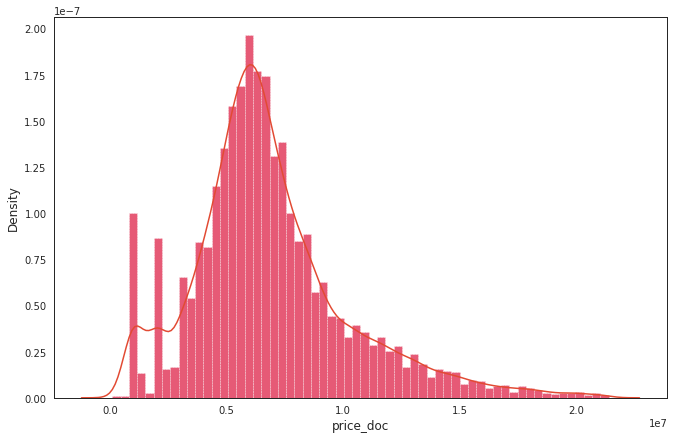

In [73]:
#plotting price distribution
plot_dist('price_doc')

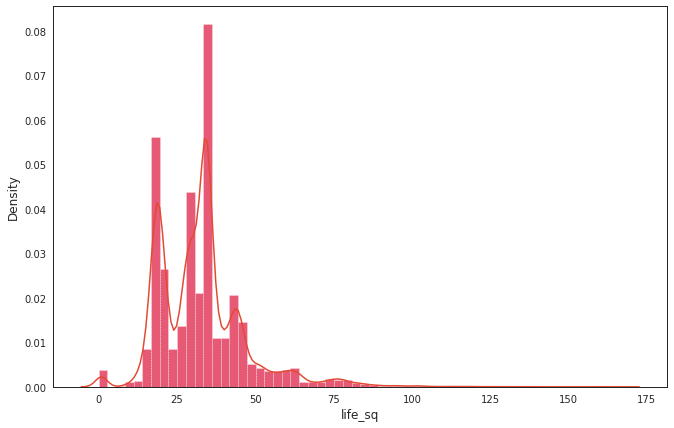

In [74]:
#plotting living area distribution
plot_dist('life_sq')

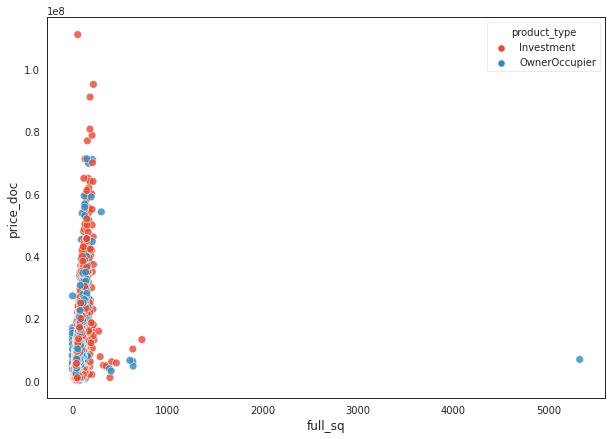

In [75]:
#plotting price and total area with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="full_sq", y="price_doc", hue="product_type", data=house_df,x_bins=70,y_bins=70,alpha=0.80, s=60 );

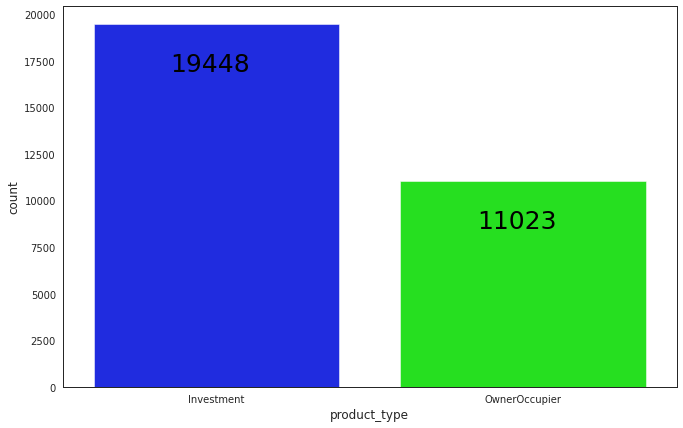

In [76]:
#displaying how many product type from original dataframe
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='product_type', data=house_df,palette="hsv_r")

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='top', color='black', size=25)
plt.show() 

***Since product_type and sub_area were removed before outlier treatment('string' type) now we need to add them back.***

In [77]:
#extracting id, product type, and sub area from original dataframe 
m2 = house_df[['id','product_type', 'sub_area']]

In [78]:
#checking head of extracted dataframe
m2.head()

,id,product_type,sub_area
0,1,Investment,Bibirevo
1,2,Investment,Nagatinskij Zaton
2,3,Investment,Tekstil'shhiki
3,4,Investment,Mitino
4,5,Investment,Basmannoe


In [79]:
#merging outlier treated dataframe and extracted to created final clean dataframe for further analysis
cleaned=(pd.merge(df, m2, on='id'))

In [80]:
#checking cleaned dataframe
cleaned.head()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month,product_type,sub_area
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6.407578e+06,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8,Investment,Bibirevo
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9.589337e+06,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,2011,8,Investment,Nagatinskij Zaton
2,3,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.808270e+06,101708,1.637996,0.453172,0.939275,3.381083,1.277658,0.468265,0.647250,2.927487,6.710302,7.506612,5.752368,1.375443,0.733101,0.841254,5700000,2011,8,Investment,Tekstil'shhiki
3,4,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,1.258354e+07,178473,0.984537,0.106125,0.451173,2.017080,4.291432,1.200336,2.677824,2.780449,6.734618,9.522538,27.892717,0.811275,0.623484,10.903161,13100000,2011,9,Investment,Mitino
4,5,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,8.398461e+06,108171,0.876620,0.236214,0.392871,2.936581,0.853960,0.820294,1.721834,3.133531,1.423428,8.671016,9.155057,1.969738,0.220288,0.991683,16331452,2011,9,Investment,Basmannoe


In [81]:
#checking shape of cleaned dataframe
cleaned.shape

(25940, 30)

In [82]:
#saving cleaned dataframe
cleaned.to_pickle('/content/drive/MyDrive/DSHW/cleaned') 

In [83]:
cleaned.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'metro_km_avto', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'university_km', 'price_doc', 'Year',
       'Month', 'product_type', 'sub_area'],
      dtype='object')

#Performing EDA on cleaned dataset

In [84]:
#seting figure attributes
pylab.rcParams['figure.figsize'] = 10,10
sns.set(rc={'figure.figsize':(12,8)},style='white')

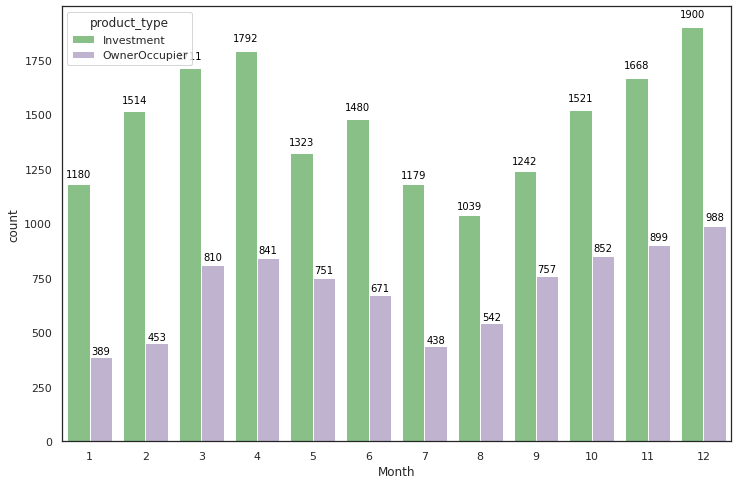

In [85]:
#checking month and sale measure of our different houses w.rt. each type 
g=sns.countplot(x="Month", hue="product_type", data=cleaned,palette= 'Accent');


for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height}', (x + width/2, y + height*1.025), ha='center',color='black', size=10)
    

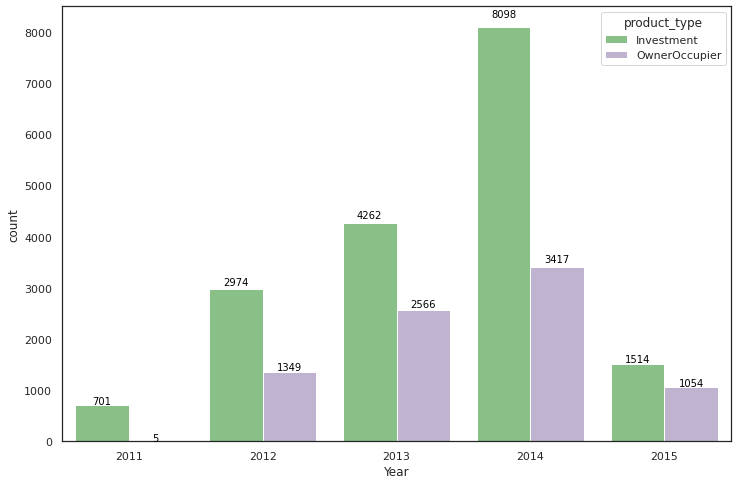

In [86]:
#checking year and sale measure of our different houses w.rt. each type 
g=sns.countplot(x="Year", hue="product_type", data=cleaned,palette= 'Accent');


for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height}', (x + width/2, y + height*1.025), ha='center',color='black', size=10)
    

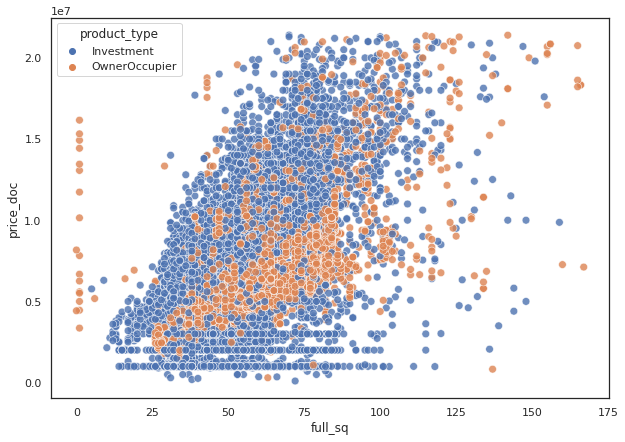

In [87]:
#plotting price and total area with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="full_sq", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

***This is much better visualisation than earlier graph prior to cleaning dataset as it's providing much better insights.***

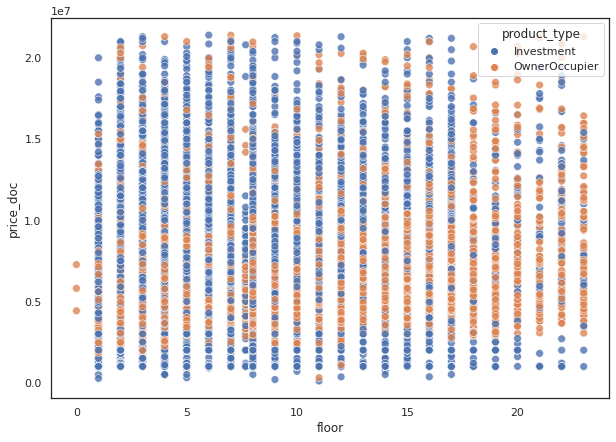

In [88]:
#plotting price and floor with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="floor", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

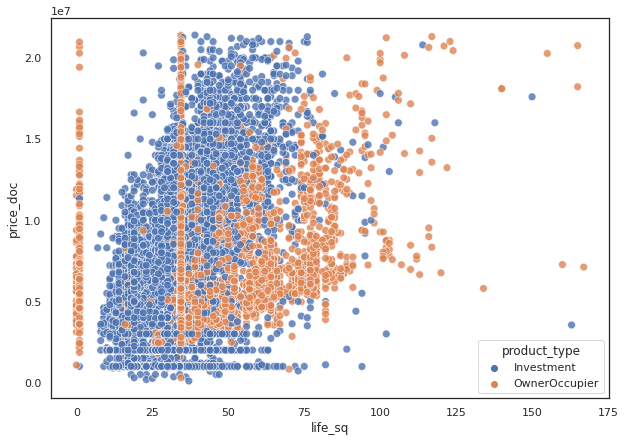

In [89]:
#plotting price and life_sq with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="life_sq", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

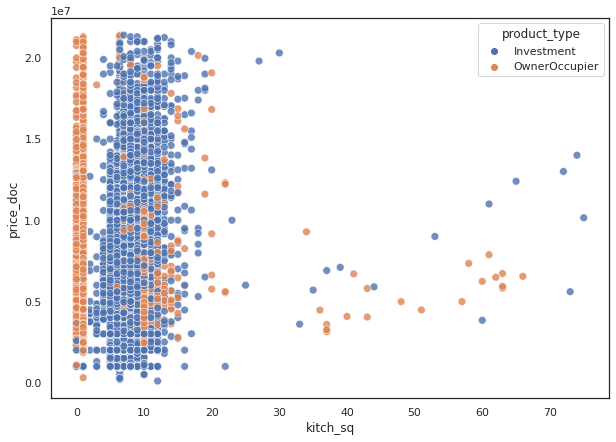

In [90]:
#plotting price and kitch_sq with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="kitch_sq", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

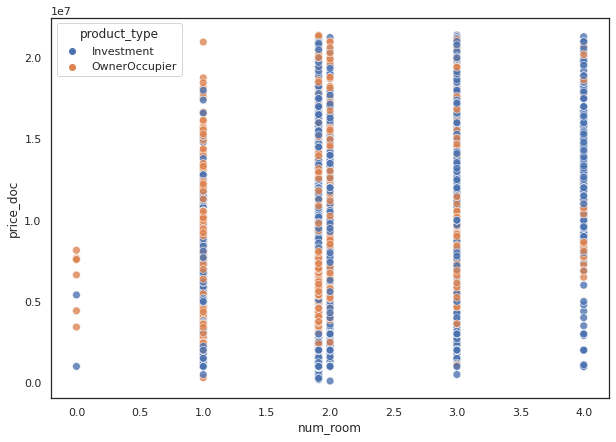

In [91]:
#plotting price and num)_room with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="num_room", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

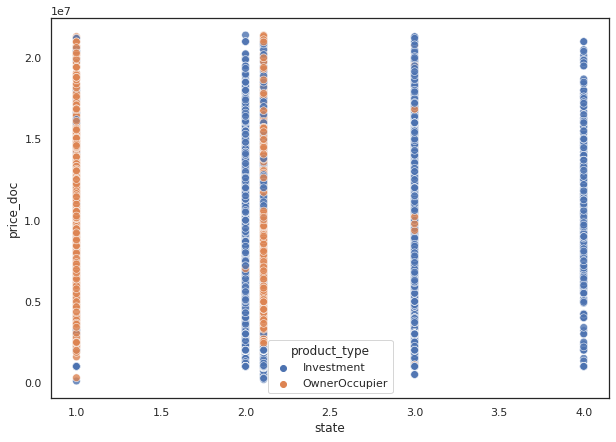

In [92]:
#plotting price and state with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="state", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

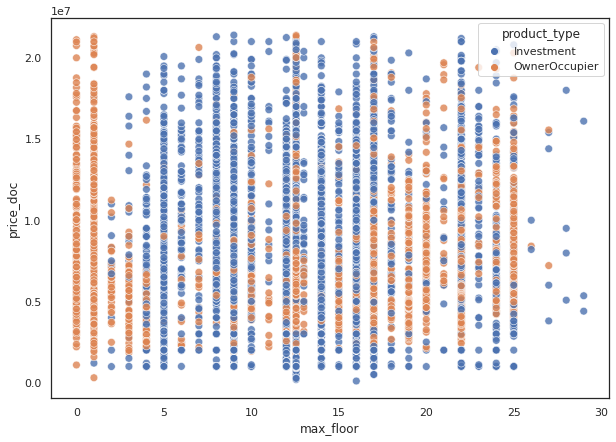

In [93]:
#plotting price and max floor with respect to investment type from original dataframe
plt.subplots(figsize=(10,7))
sns.scatterplot(x="max_floor", y="price_doc", hue="product_type", data=cleaned,x_bins=70,y_bins=70,alpha=0.80, s=60 );

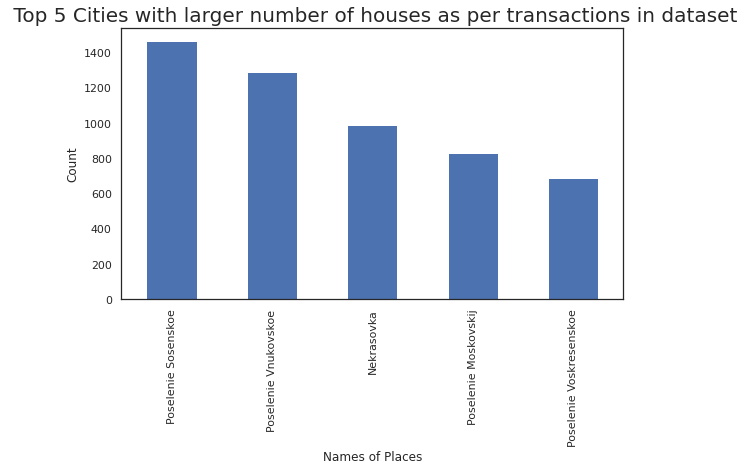

In [94]:
# plotting for frequent locations in the dataset
cleaned['sub_area'].value_counts().head(5).plot.bar(figsize = (9, 5))
plt.title(' Top 5 Cities with larger number of houses as per transactions in dataset', fontsize = 20)
plt.xlabel('Names of Places')
plt.ylabel('Count')
plt.show()

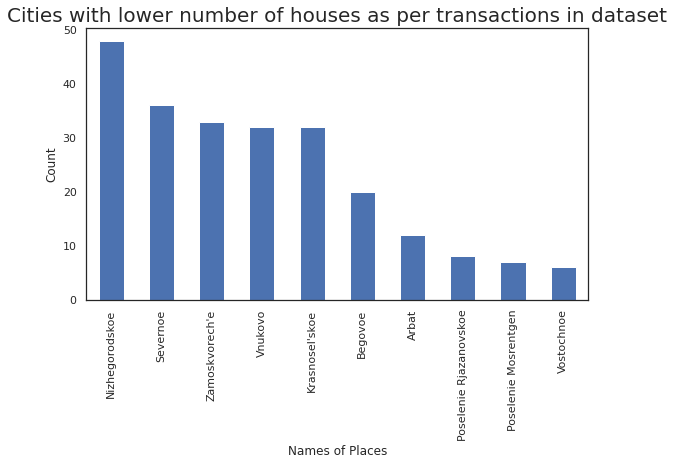

In [95]:
# plotting for frequent locations in the dataset
cleaned['sub_area'].value_counts().tail(10).plot.bar(figsize = (9, 5))
plt.title('Cities with lower number of houses as per transactions in dataset', fontsize = 20)
plt.xlabel('Names of Places')
plt.ylabel('Count')
plt.show()

In [96]:
cleaned['price_doc'].describe()

count    2.594000e+04
mean     6.883499e+06
std      3.378903e+06
min      1.000000e+05
25%      4.903165e+06
50%      6.332358e+06
75%      8.300000e+06
max      2.140000e+07
Name: price_doc, dtype: float64

In [97]:
#creating dataframe of houses more than 15 million price
top= cleaned.loc[cleaned['price_doc'] >= 15000000]

In [98]:
#displaying top 5
top.shape 

(808, 30)

So there are more than 800 houses that are extremely expensive i.e. more than $15 million

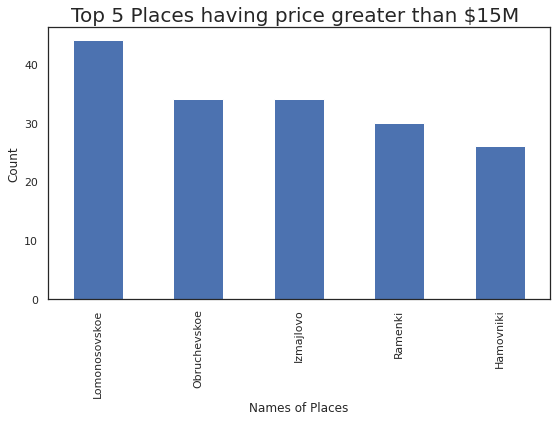

In [99]:
# plotting for frequent locations in the dataset
top['sub_area'].value_counts().head(5).plot.bar(figsize = (9, 5))
plt.title('Top 5 Places having price greater than $15M ', fontsize = 20)
plt.xlabel('Names of Places')
plt.ylabel('Count')
plt.show()

In [100]:
#creating dataframe of houses less than average price
b_avg= cleaned.loc[cleaned['price_doc'] <= 6900000]

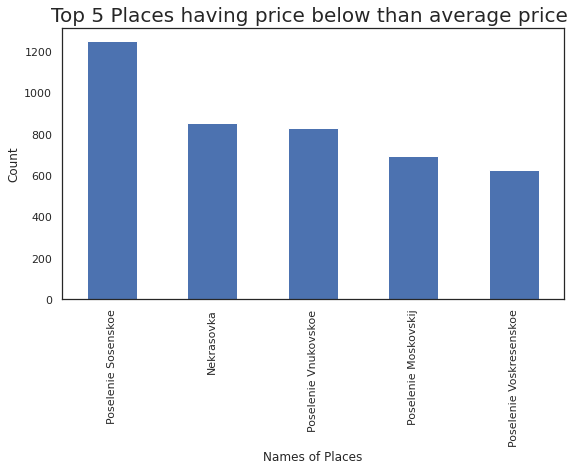

In [101]:
# plotting for locations having price below than average in the dataset
b_avg['sub_area'].value_counts().head(5).plot.bar(figsize = (9, 5))
plt.title('Top 5 Places having price below than average price ', fontsize = 20)
plt.xlabel('Names of Places')
plt.ylabel('Count')
plt.show()

In [102]:
#creating dataframe of houses more than average price
a_avg= cleaned.loc[cleaned['price_doc'] >= 6900000]

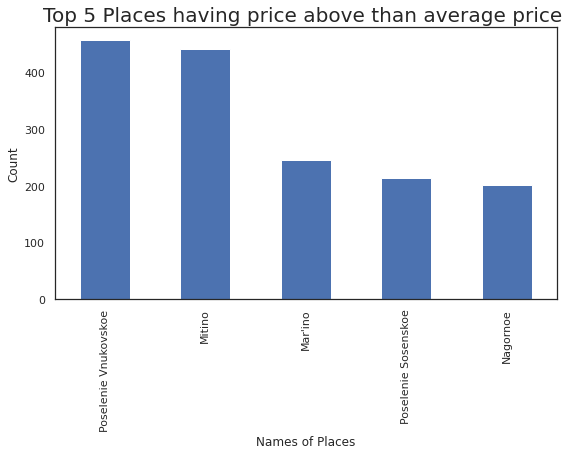

In [103]:
# plotting for locations having price above than average in the dataset
a_avg['sub_area'].value_counts().head(5).plot.bar(figsize = (9, 5))
plt.title('Top 5 Places having price above than average price ', fontsize = 20)
plt.xlabel('Names of Places')
plt.ylabel('Count')
plt.show()

In [104]:
#showing columns in cleaned dataset
cleaned.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'metro_km_avto', 'green_zone_km', 'industrial_km', 'cemetery_km',
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'university_km', 'price_doc', 'Year',
       'Month', 'product_type', 'sub_area'],
      dtype='object')

In [105]:
#creating with top 13 feature of dataframe for multivariate analysis
mult_df= cleaned[['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m','price_doc','product_type', 'sub_area']]

In [106]:
mult_df.head(2)

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,price_doc,product_type,sub_area
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.100,5850000,Investment,Bibirevo
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9589336.912,6000000,Investment,Nagatinskij Zaton


[Multivariate analysis can be visualised by clicking here](https://drive.google.com/file/d/18C_5BXC7IL6DXldRtzHufF6oral8MnmJ/view?usp=sharing)

#Implementing Linear regression model

In [107]:
#handling categorical features
df_new = pd.get_dummies(cleaned,columns=['product_type','sub_area'])

In [108]:
#displaying datframe after encoding
df_new.head()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,price_doc,Year,Month,product_type_Investment,product_type_OwnerOccupier,sub_area_Ajeroport,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,...,sub_area_Poselenie Shherbinka,sub_area_Poselenie Sosenskoe,sub_area_Poselenie Vnukovskoe,sub_area_Poselenie Voskresenskoe,sub_area_Preobrazhenskoe,sub_area_Presnenskoe,sub_area_Prospekt Vernadskogo,sub_area_Ramenki,sub_area_Rjazanskij,sub_area_Rostokino,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6.407578e+06,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,5850000,2011,8,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9.589337e+06,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,6000000,2011,8,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,43,29.0,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.808270e+06,101708,1.637996,0.453172,0.939275,3.381083,1.277658,0.468265,0.647250,2.927487,6.710302,7.506612,5.752368,1.375443,0.733101,0.841254,5700000,2011,8,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,89,50.0,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,1.258354e+07,178473,0.984537,0.106125,0.451173,2.017080,4.291432,1.200336,2.677824,2.780449,6.734618,9.522538,27.892717,0.811275,0.623484,10.903161,13100000,2011,9,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,77,77.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,8.398461e+06,108171,0.876620,0.236214,0.392871,2.936581,0.853960,0.820294,1.721834,3.133531,1.423428,8.671016,9.155057,1.969738,0.220288,0.991683,16331452,2011,9,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
#splitting X and y
X = df_new.drop(['price_doc'] , axis = 1)
y= df_new.price_doc

In [110]:
#displaying first two observations of X 
X.head(2)

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,metro_km_avto,green_zone_km,industrial_km,cemetery_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,fitness_km,university_km,Year,Month,product_type_Investment,product_type_OwnerOccupier,sub_area_Ajeroport,sub_area_Akademicheskoe,sub_area_Alekseevskoe,sub_area_Altuf'evskoe,sub_area_Arbat,sub_area_Babushkinskoe,sub_area_Basmannoe,sub_area_Begovoe,sub_area_Beskudnikovskoe,sub_area_Bibirevo,sub_area_Birjulevo Vostochnoe,...,sub_area_Poselenie Shherbinka,sub_area_Poselenie Sosenskoe,sub_area_Poselenie Vnukovskoe,sub_area_Poselenie Voskresenskoe,sub_area_Preobrazhenskoe,sub_area_Presnenskoe,sub_area_Prospekt Vernadskogo,sub_area_Ramenki,sub_area_Rjazanskij,sub_area_Rostokino,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino
0,1,43,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.100,155572,1.131260,0.600973,1.080934,1.804127,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,0.485841,6.715026,2011,8,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,9589336.912,115352,0.647337,0.065321,0.966479,4.655004,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,0.668364,1.852560,2011,8,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
#Splitting into 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [112]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [115]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_doc   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:14:32   Log-Likelihood:            -4.1682e+05
No. Observations:               25940   AIC:                         8.339e+05
Df Residuals:                   25787   BIC:                         8.352e+05
Df Model:                         152                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -4.969e+08   1.04e+08     -4.758      0.000   -7.02e+08   -2.92e+08
id                                    13.8274      8.534      1.620      0.105      -2.900      30.555
full_sq                              9.85e+04   1396.955     70.510      0.000    9.58e+04    1.01e+05
life_sq                             4504.8702   1509.770      2.984      0.003    1545.636    7464.104
floor                               3.669e+04   3242.952     11.313      0.000    3.03e+04     4.3e+04
max_floor                           2.583e+04   3342.800      7.726      0.000    1.93e+04    3.24e+04
material                           -6.371e+04   1.46e+04     -4.363      0.000   -9.23e+04   -3.51e+04
num_room                             2.08e+05   3.08e+04      6.754      0.000    1.48e+05    2.68e+05
kitch_sq                            2.358e+04   5183.743      4.549      0.000    1.34e+04    3.37e+04
state                               3.325e+05   2.86e+04     11.612      0.000    2.76e+05    3.89e+05
area_m                                -0.5336      0.103     -5.176      0.000      -0.736      -0.332
raion_popul                         -169.6816     36.187     -4.689      0.000    -240.610     -98.753
metro_km_avto                      -1.217e+05   2.04e+04     -5.956      0.000   -1.62e+05   -8.16e+04
green_zone_km                      -4.179e+05   8.33e+04     -5.014      0.000   -5.81e+05   -2.55e+05
industrial_km                      -7.216e+04   3.78e+04     -1.908      0.056   -1.46e+05    1965.076
cemetery_km                        -1.054e+05   2.57e+04     -4.099      0.000   -1.56e+05    -5.5e+04
railroad_station_walk_km           -9.494e+04    1.8e+04     -5.260      0.000    -1.3e+05   -5.96e+04
water_km                           -9.994e+04   4.83e+04     -2.070      0.038   -1.95e+05   -5300.061
big_road1_km                         290.2746   2.82e+04      0.010      0.992    -5.5e+04    5.56e+04
big_road2_km                       -6.491e+04   2.23e+04     -2.915      0.004   -1.09e+05   -2.13e+04
bus_terminal_avto_km                5.316e+04   1.34e+04      3.982      0.000     2.7e+04    7.93e+04
nuclear_reactor_km                  1.255e+05   2.06e+04      6.090      0.000    8.51e+04    1.66e+05
big_market_km                       5.257e+04    1.2e+04      4.376      0.000     2.9e+04    7.61e+04
market_shop_km                     -3.755e+04   1.71e+04     -2.200      0.028    -7.1e+04   -4099.720
fitness_km                         -8.502e+04   3.49e+04     -2.434      0.015   -1.54e+05   -1.65e+04
university_km                      -1.378e+05   1.73e+04     -7.941      0.000   -1.72e+05   -1.04e+05
Year                                3.826e+05   8.04e+04      4.759      0.000    2.25e+05     5

As some of the features are giving p-value>0.05 such as id, industrial_km, big_road1, and few sub_areas. So it better to remove them.
Also even though R square value 


#Creating new dataframe for another model for better explainabilty

In [116]:
#removing subarea from our dataset and checking new summary
ols_df= cleaned[['id', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'num_room', 'kitch_sq', 'state', 'area_m', 
       'metro_km_avto', 'green_zone_km',  
       'railroad_station_walk_km', 'water_km', 'big_road1_km', 'big_road2_km',
       'bus_terminal_avto_km', 'nuclear_reactor_km', 'big_market_km',
       'market_shop_km',  'university_km', 'price_doc', 'Year',
       'Month','product_type']]

In [117]:
#handling categorical variable 
ols = pd.get_dummies(ols_df,columns=['product_type'])

In [118]:
#splitting dataframe into X and y for applying machine learning model
X = ols.drop(['price_doc','id'] , axis = 1)
y= ols.price_doc

In [119]:
#displaying first two rows of dataset 
X.head(2)

,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,state,area_m,metro_km_avto,green_zone_km,railroad_station_walk_km,water_km,big_road1_km,big_road2_km,bus_terminal_avto_km,nuclear_reactor_km,big_market_km,market_shop_km,university_km,Year,Month,product_type_Investment,product_type_OwnerOccupier
0,43,27.0,4.0,12.558974,1.909804,6.399301,2.107025,6407578.100,1.131260,0.600973,5.419893,0.992631,1.422391,3.830951,24.292406,5.718519,10.814172,1.676258,6.715026,2011,8,1,0
1,34,19.0,3.0,12.558974,1.909804,6.399301,2.107025,9589336.912,0.647337,0.065321,3.411993,0.698081,2.887377,3.103996,5.706113,3.489954,6.910568,3.424716,1.852560,2011,8,1,0


In [120]:
#doing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [121]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [123]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [124]:
#showing model summary
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_doc   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:14:32   Log-Likelihood:            -4.1861e+05
No. Observations:               25940   AIC:                         8.373e+05
Df Residuals:                   25917   BIC:                         8.375e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6.719e+08   2.24e+07    -30.029      0.000   -7.16e+08   -6.28e+08
full_sq                      1.03e+05   1450.483     70.997      0.000       1e+05    1.06e+05
life_sq                     6837.4258   1597.481      4.280      0.000    3706.274    9968.577
floor                        3.97e+04   3414.765     11.626      0.000     3.3e+04    4.64e+04
max_floor                   1.222e+04   3412.354      3.581      0.000    5530.537    1.89e+04
num_room                    1.953e+05   3.24e+04      6.018      0.000    1.32e+05    2.59e+05
kitch_sq                    2.562e+04   5406.807      4.739      0.000     1.5e+04    3.62e+04
state                       3.227e+05   3.01e+04     10.739      0.000    2.64e+05    3.82e+05
area_m                        -0.0114      0.002     -7.215      0.000      -0.015      -0.008
metro_km_avto               -1.94e+05   1.08e+04    -17.938      0.000   -2.15e+05   -1.73e+05
green_zone_km              -1.995e+05   7.53e+04     -2.651      0.008   -3.47e+05    -5.2e+04
railroad_station_walk_km    4.618e+04   7407.634      6.233      0.000    3.17e+04    6.07e+04
water_km                   -4.649e+05   3.85e+04    -12.065      0.000    -5.4e+05   -3.89e+05
big_road1_km               -1.051e+05   1.51e+04     -6.946      0.000   -1.35e+05   -7.54e+04
big_road2_km               -6.414e+04   1.26e+04     -5.075      0.000   -8.89e+04   -3.94e+04
bus_terminal_avto_km       -2.468e+04   3572.287     -6.908      0.000   -3.17e+04   -1.77e+04
nuclear_reactor_km         -6.018e+04   3899.986    -15.430      0.000   -6.78e+04   -5.25e+04
big_market_km                3.82e+04   2847.203     13.417      0.000    3.26e+04    4.38e+04
market_shop_km              8.347e+04   9553.256      8.737      0.000    6.47e+04    1.02e+05
university_km              -8.747e+04   5128.319    -17.056      0.000   -9.75e+04   -7.74e+04
Year                        5.011e+05   1.67e+04     30.073      0.000    4.68e+05    5.34e+05
Month                       3.277e+04   4546.652      7.207      0.000    2.39e+04    4.17e+04
product_type_Investment    -3.358e+08   1.12e+07    -30.017      0.000   -3.58e+08   -3.14e+08
product_type_OwnerOccupier -3.361e+08   1.12e+07    -30.041      0.000   -3.58e+08   -3.14e+08
==============================================================================
Omnibus:                     3432.410   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14139.459
Skew:                          -0.609   Prob(JB):                         0.00
Kurtosis:                       6.406   Cond. No.                     5.00e+21
==============================================================================

Warnings:
[1] Standard Errors assume that t

***As we can see for every column we have p-value <0.05 which rejects null hyptothesis of their irrelavance in our prediction.***

The correct R2 value depends on your study area. Different research questions have different amounts of variability that are inherently unexplainable. Case in point, humans are hard to predict. Any study that attempts to predict human behavior will tend to have R-squared values less than 50%. However, if you analyze a physical process and have very good measurements, you might expect R-squared values over 90%. There is no one-size fits all best answer for how high R-squared should be.
***Another way to improve would be adding some MACRO ECONOMIC features such as GDP, employment rate, mortgage rate, per capita income.***
And since economy depends on human behaviour which in turn affects all other aspects whether it's a real state or any economical instrument this is acceptable. ***But this could be improved by SME (subject matter expert) or Domain Expert.*** 

**Therefore by above model we have explainability with respect to each feature.** 

In [125]:
#storing 100 observations for analysis
dc_pred = y_pred[:500]
dc_real = y_test[:500]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

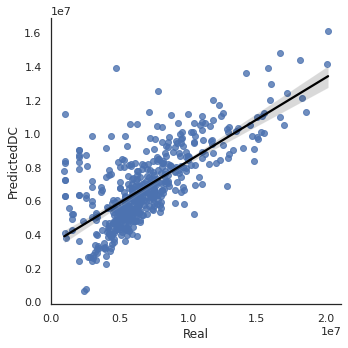

In [126]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

In [127]:
# defining MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100


In [128]:
#y_predicted = regressor.predict(X_train)
y_test_predicted = regressor.predict(X_test)

In [129]:
print(
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Testing MAPE : 45.92048421445057


#Since ML is an iterative process reworking on the dataset and moving forwards with ML models.

In [130]:
macro=pd.read_csv('/content/drive/MyDrive/DSHW/macro.csv')
train=pd.read_csv('/content/drive/MyDrive/DSHW/train.csv')
test=pd.read_csv('/content/drive/MyDrive/DSHW/test.csv')

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [132]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: float64(116), int64(159), object(16)
memory usage: 17.0+ MB


In [133]:

train.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6407578.100,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9589336.912,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4808269.831,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000


In [134]:

test.head(2)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,26155137.04,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,25536296.81,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1


***Preprocessing the dataset***


In [135]:
# Creating a list of input columns
input_col=list(train.columns)[1:-1]

In [136]:


# Creating a list of target column
target_col='price_doc'

In [137]:


inputs=train[input_col].copy()

In [138]:
target=train[target_col]

In [139]:

#Dividing the data into Numeric and Categorical types
numeric_cols=inputs.select_dtypes(include=['int64','float64']).columns.tolist()

In [140]:
categorical_cols=inputs.select_dtypes(include=['object']).columns.tolist()

Data Cleaning

In [141]:
#For train inputs
missing_counts = inputs[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts>0]

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_min_price_avg               13281
cafe_sum_500_max_price_avg               13281
cafe_avg_price_500                       13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
cafe_avg_price_1000                       6524
life_sq                                   6383
build_count_1946-1970                     4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_slag                          4991
build_count_frame                         4991
build_count_m

In [ ]:
!pip install scikit-learn==0.23.2

In [144]:
import numpy as np 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(train[numeric_cols])
inputs[numeric_cols]=imputer.transform(inputs[numeric_cols])




In [145]:
inputs

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,2011-08-20,43.0,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.000000,5.0,10309.0,11065.000000,5.0,0.0,240.000000,1.0,0.0,7.0,3.0,no,0.0,16.0,1.0,no,no,no,no,no,no,no,no,...,68.0,639.68,1079.37,859.52,5.0,21.0,22.0,16.0,3.0,1.0,0.0,2.0,4.0,0.0,0.0,21.0,1.0,13.09,13.31,29.0,807385.0,52.0,4036616.0,152.0,708.57,1185.71,947.14,12.0,39.0,48.0,40.0,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0
1,2011-08-23,34.0,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.000000,5.0,7759.0,6237.000000,8.0,0.0,229.000000,1.0,0.0,6.0,1.0,yes,1.0,3.0,0.0,no,no,no,no,no,no,no,no,...,30.0,631.03,1086.21,858.62,1.0,11.0,11.0,4.0,2.0,1.0,0.0,1.0,7.0,0.0,6.0,19.0,1.0,10.26,27.47,66.0,2690465.0,40.0,2034942.0,177.0,673.81,1148.81,911.31,9.0,49.0,65.0,36.0,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0
2,2011-08-27,43.0,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.000000,4.0,6207.0,5580.000000,7.0,0.0,1183.000000,1.0,0.0,5.0,1.0,no,0.0,0.0,1.0,no,no,no,yes,no,no,no,no,...,41.0,697.44,1192.31,944.87,2.0,9.0,17.0,9.0,3.0,1.0,0.0,0.0,11.0,0.0,0.0,20.0,6.0,13.69,21.58,43.0,1478160.0,35.0,1572990.0,122.0,702.68,1196.43,949.55,10.0,29.0,45.0,25.0,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0
3,2011-09-01,89.0,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.000000,9.0,13670.0,17063.000000,10.0,0.0,1190.738677,1.0,0.0,17.0,6.0,no,0.0,11.0,4.0,no,no,no,no,no,no,no,no,...,32.0,718.75,1218.75,968.75,0.0,5.0,14.0,10.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,18.0,3.0,14.18,3.89,8.0,244166.0,22.0,942180.0,61.0,931.58,1552.63,1242.11,4.0,7.0,21.0,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0
4,2011-09-05,77.0,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.000000,7.0,6748.0,7770.000000,9.0,0.0,562.000000,4.0,2.0,25.0,2.0,no,0.0,10.0,93.0,no,no,no,yes,yes,no,no,no,...,1068.0,853.03,1410.45,1131.74,63.0,266.0,267.0,262.0,149.0,57.0,4.0,70.0,121.0,1.0,40.0,77.0,5.0,8.38,10.92,689.0,8404624.0,114.0,3503058.0,2283.0,853.88,1411.45,1132.66,143.0,566.0,578.0,552.0,319.0,108.

In [146]:
#build_year is quite high and impracticle. It need to be dropped. Same for timestamp
inputs.drop('build_year', inplace=True, axis=1)
inputs.drop('timestamp', inplace=True, axis=1)

In [147]:
numeric_cols.remove('build_year')
categorical_cols.remove('timestamp')

In [148]:
missing_counts = inputs[numeric_cols].isna().sum().sort_values(ascending=False)

In [149]:
#Scaling of Numerical values
inputs[numeric_cols].describe().loc[['min', 'max']]

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.081628e+06,2546.0,0.001879,0.000000,175.0,0.0,0.0,168.0,1012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2546.0,1208.0,1341.0,365.0,189.0,177.0,1633.0,863.0,771.0,548.0,156.0,393.0,175.0,...,0.0,300.00,500.0,400.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.52,0.21,0.0,0.0,0.0,0.0,0.0,300.0,500.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5326.0,7478.0,77.0,117.0,6.0,19.0,2014.0,33.0,2.060718e+08,247469.0,0.852923,0.521867,19223.0,11926.0,13.0,19083.0,24750.0,14.0,2.0,4849.0,6.0,3.0,29.0,16.0,10.0,23.0,141.0,1716730.0,774585.0,942145.0,40692.0,20977.0,19715.0,161290.0,79622.0,81668.0,57086.0,19275.0,37811.0,19223.0,...,1815.0,1833.33,3000.0,2416.67,119.0,449.0,441.0,446.0,266.0,113.0,23.0,102.0,164.0,2.0,85.0,100.0,10.0,75.46,28.56,789.0,12702114.0,120.0,4585477.0,2645.0,1875.0,3000.0,2437.5,174.0,650.0,648.0,641.0,377.0,147.0,30.0,151.0,250.0,2.0,106.0,218.0,21.0


Encoding catergorical Columns

In [150]:
inputs[categorical_cols].nunique().sort_values(ascending=False)

sub_area                     146
ecology                        5
railroad_1line                 2
big_road1_1line                2
water_1line                    2
detention_facility_raion       2
nuclear_reactor_raion          2
big_market_raion               2
railroad_terminal_raion        2
radiation_raion                2
oil_chemistry_raion            2
incineration_raion             2
thermal_power_plant_raion      2
culture_objects_top_25         2
product_type                   2
dtype: int64

In [151]:
from sklearn.preprocessing import OneHotEncoder
#Creating the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#Fitting the encoder to the categorical colums
encoder.fit(train[categorical_cols])
#Generating column names for each category
encoded_cols = list(encoder.get_feature_names(categorical_cols))
# Transforming and adding new one-hot category columns
inputs[encoded_cols] = encoder.transform(train[categorical_cols])

In [152]:
inputs


,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,43.0,27.000000,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.000000,5.0,10309.0,11065.000000,5.0,0.0,240.000000,1.0,0.0,7.0,3.0,no,0.0,16.0,1.0,no,no,no,no,no,no,no,no,86206.0,40477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,34.0,19.000000,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.000000,5.0,7759.0,6237.000000,8.0,0.0,229.000000,1.0,0.0,6.0,1.0,yes,1.0,3.0,0.0,no,no,no,no,no,no,no,no,76284.0,34200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,43.0,29.000000,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.000000,4.0,6207.0,5580.000000,7.0,0.0,1183.000000,1.0,0.0,5.0,1.0,no,0.0,0.0,1.0,no,no,no,yes,no,no,no,no,101982.0,46076.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,89.0,50.000000,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.000000,9.0,13670.0,17063.000000,10.0,0.0,1190.738677,1.0,0.0,17.0,6.0,no,0.0,11.0,4.0,no,no,no,no,no,no,no,no,21155.0,9828.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77.0,77.000000,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.000000,7.0,6748.0,7770.000000,9.0,0.0,562.000000,4.0,2.0,25.0,2.0,no,0.0,10.0,93.0,no,no,no,yes,yes,no,no,no,28179.0,13522.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [236]:
#saving  dataframe
inputs.to_pickle('/content/drive/MyDrive/DSHW/whole') 

Training and validation

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs[numeric_cols + encoded_cols], 
                                                                        target, 
                                                                        test_size=0.20, 
                                                                        random_state=31)

In [155]:
train_inputs.head()

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
26648,31.0,21.000000,1.0,9.000000,5.000000,1.000000,5.000000,2.000000,5.391434e+06,123000.0,0.079151,0.000000,6715.0,3092.0,5.0,6714.0,6442.0,5.0,0.0,2672.000000,0.0,2.0,4.0,2.0,0.0,2.0,2.0,76670.0,36352.0,40318.0,14317.0,7412.0,6905.0,78835.0,42329.0,36506.0,29848.0,8485.0,21363.0,6715.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7829,43.0,29.000000,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,7.506452e+06,43795.0,0.007670,0.486246,2418.0,852.0,2.0,2514.0,2012.0,3.0,0.0,1190.738677,0.0,0.0,7.0,0.0,0.0,6.0,19.0,19940.0,9400.0,10540.0,5291.0,2744.0,2547.0,29660.0,15793.0,13867.0,8844.0,2608.0,6236.0,2418.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9349,31.0,31.000000,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,4.934147e+06,86206.0,0.116400,0.122190,4300.0,1578.0,3.0,4724.0,5461.0,3.0,0.0,1308.000000,1.0,0.0,6.0,2.0,0.0,3.0,2.0,55125.0,25551.0,29574.0,9734.0,5192.0,4542.0,52560.0,28071.0,24489.0,23912.0,7214.0,16698.0,4300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
18068,40.0,34.403271,11.0,17.000000,1.000000,1.000000,0.000000,2.107025,1.139168e+07,19940.0,0.055644,0.243205,1706.0,2395.0,5.0,1564.0,7377.0,5.0,0.0,540.000000,0.0,0.0,0.0,4.0,0.0,0.0,0.0,247469.0,112902.0,134567.0,3459.0,1782.0,1677.0,13331.0,6670.0,6661.0,3150.0,948.0,2202.0,1706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5183,71.0,37.000000,14.0,12.558974,1.827121,1.909804,6.399301,2.107025,7.905261e+06,85956.0,0.014925,0.319809,4257.0,643.0,4.0,4756.0,5180.0,4.0,0.0,2857.000000,5.0,1.0,14.0,4.0,0.0,8.0,16.0,85083.0,37595.0,47488.0,9647.0,5248.0,4399.0,55337.0,28925.0,26412.0,20972.0,6551.0,14421.0,4257.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [156]:
val_inputs.head()

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
10246,54.0,32.000000,4.0,16.000000,1.000000,2.000000,9.000000,3.000000,4.934147e+06,86206.0,0.116400,0.122190,4300.0,1578.0,3.0,4724.0,5461.0,3.0,0.0,1308.000000,1.0,0.0,6.0,2.0,0.0,3.0,2.0,55125.0,25551.0,29574.0,9734.0,5192.0,4542.0,52560.0,28071.0,24489.0,23912.0,7214.0,16698.0,4300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
21366,72.0,43.000000,7.0,19.000000,1.000000,3.000000,9.000000,3.000000,4.787424e+06,96959.0,0.038456,0.122090,6507.0,3272.0,4.0,6566.0,8751.0,6.0,0.0,1894.000000,4.0,0.0,7.0,6.0,0.0,0.0,7.0,78810.0,36091.0,42719.0,13901.0,7344.0,6557.0,59120.0,29664.0,29456.0,23938.0,6980.0,16958.0,6507.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10420,74.0,34.403271,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,2.615514e+07,178264.0,0.137846,0.041116,14080.0,11926.0,11.0,14892.0,24750.0,13.0,1.0,1190.738677,1.0,0.0,13.0,4.0,0.0,4.0,4.0,102618.0,47681.0,54937.0,30808.0,16251.0,14557.0,121369.0,59138.0,62231.0,26087.0,7410.0,18677.0,14080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14992,35.0,19.000000,3.0,5.000000,2.000000,1.000000,8.000000,2.000000,1.050803e+07,81887.0,0.331319,0.020741,4969.0,1807.0,4.0,5613.0,6217.0,8.0,0.0,1340.000000,2.0,0.0,12.0,1.0,0.0,5.0,5.0,57107.0,26917.0,30190.0,11205.0,5858.0,5347.0,52030.0,25541.0,26489.0,18652.0,5671.0,12981.0,4969.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28372,100.0,96.000000,5.0,17.000000,1.000000,4.000000,10.000000,3.000000,1.175477e+07,247469.0,0.188713,0.090799,19223.0,10175.0,13.0,19083.0,21892.0,14.0,0.0,1190.738677,5.0,0.0,16.0,16.0,0.0,15.0,2.0,165727.0,75503.0,90224.0,40692.0,20977.0,19715.0,161290.0,79622.0,81668.0,45487.0,12303.0,33184.0,19223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [157]:
train_targets.head()

26648    5400000
7829     6400000
9349     6000000
18068    4400000
5183     9200000
Name: price_doc, dtype: int64

In [158]:
val_targets.head()

10246     9000000
21366     5000000
10420     7332000
14992     5300000
28372    14650000
Name: price_doc, dtype: int64

Linear Regression Model using Elastic Net for advantage as Ridge and Lasso are not giving desirable result.

In [219]:
from sklearn.linear_model import ElasticNet
# Create the model
model = model = ElasticNet()
# Fit the model using inputs and targets
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7406003381909466e+17, tolerance: 55829973140831.07
  Xy = check_array(


ElasticNet()

In [220]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [221]:

X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [222]:
train_preds = model.predict(X_train)
train_preds

array([6430818.27823436, 5304712.26269899, 6349779.97572609, ...,
       4935229.82115822, 7745470.66078796, 6863893.99231703])

In [223]:

print('The RMSE loss for the training set is ₽ {}.'.format(mean_squared_error(train_targets, train_preds, squared=False)))

The RMSE loss for the training set is ₽ 3703718.9639513725.


In [224]:
print('The MAE loss for the training set is ₽ {}.'.format(mape(train_targets, train_preds)))

The MAE loss for the training set is ₽ 52.81707752433369.


In [225]:

val_preds = model.predict(X_val)
val_preds

array([8044804.7158876 , 8966546.27413087, 8051805.10491804, ...,
       7057353.5235252 , 3982715.71239102, 9361152.50354223])

In [226]:

print('The RMSE loss for the valication set is ₽ {}.'.format(mean_squared_error(val_targets, val_preds, squared=False)))

The RMSE loss for the valication set is ₽ 3559723.4027315327.


In [227]:


print('The RMSE loss for the valication set is ₽ {}.'.format(mape(val_targets, val_preds)))

The RMSE loss for the valication set is ₽ 54.96664227061016.


Feature Importance

In [228]:
weights=model.coef_

In [229]:



weights_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

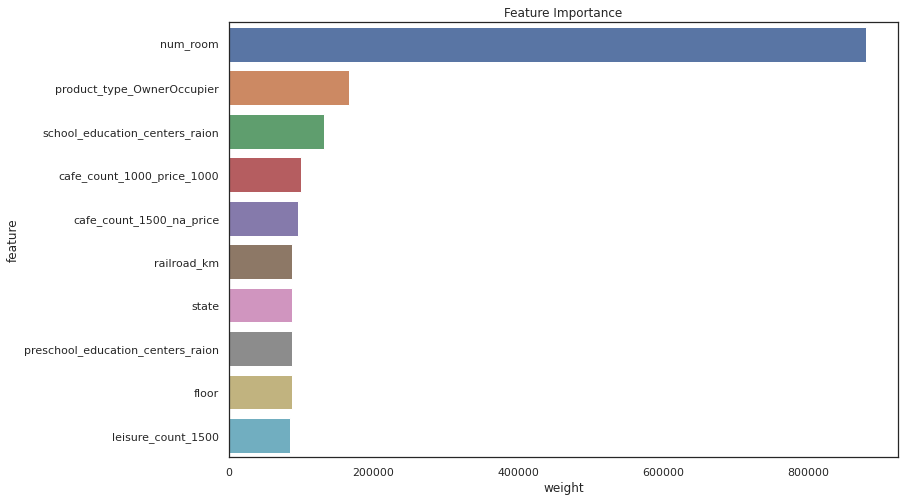

In [230]:
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(10), x='weight', y='feature');

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

In [265]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=21, max_depth= 70,
  max_features='auto',
  min_samples_leaf= 4,
  min_samples_split= 10,
  n_estimators= 400)
# Fit the model
rf1.fit(train_inputs,train_targets)
rf1.score(train_inputs,train_targets)

0.8802307954787882

In [266]:
rf1_train_preds=rf1.predict(train_inputs)


In [267]:

rf1_train_rmse= mean_squared_error(train_targets,rf1_train_preds, squared=False )

In [268]:




rf1_val_preds=rf1.predict(val_inputs)

In [269]:
rf1_val_rmse= mean_squared_error(val_targets,rf1_val_preds, squared=False )

In [270]:


print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 1656246.8732305982, Validation RMSE: 2640197.3378735287


In [271]:
# Check feature importance
tree_importances = rf1.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)
tree_importance_df

,feature,importance
0,full_sq,0.447740
264,cafe_count_5000_price_2500,0.047193
241,cafe_count_3000_price_2500,0.039251
210,cafe_count_2000,0.029805
233,cafe_count_3000,0.023345
...,...,...
397,sub_area_Sokol'niki,0.000000
403,sub_area_Taganskoe,0.000000
407,sub_area_Troickij okrug,0.000000
408,sub_area_Troparevo-Nikulino,0.000000


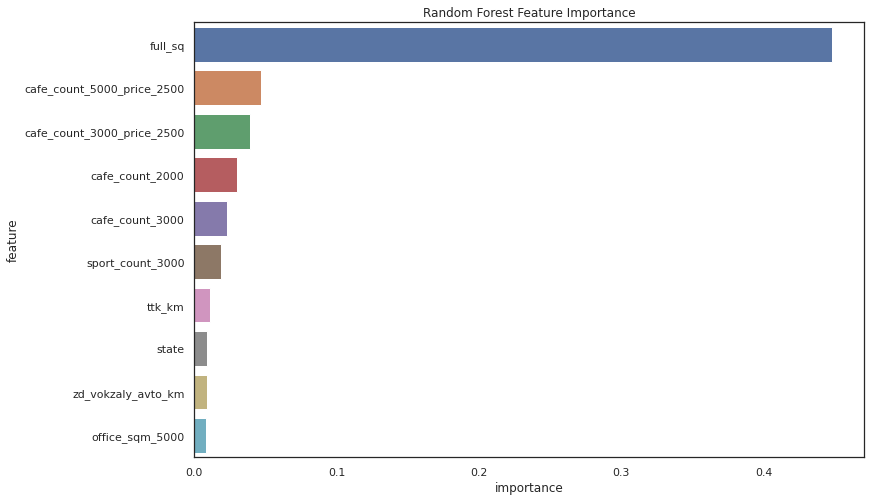

In [272]:

plt.title('Random Forest Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

We can combine all top 10 features from feature importance of RandomForest and Elasticnet and then can create new dataframe for further analysis. Columns are listed below. 

In [272]:
col_af_fi=['full_sq','cafe_count_5000_price_2500','cafe_count_3000_price_2500','cafe_count_2000','cafe_count_3000','sport_count_3000','ttk_km',	
'state','zd_vokzaly_avto_km','office_sqm_5000','num_room','product_type_OwnerOccupier','school_education_centers_raion','cafe_count_1000_price_1000','cafe_count_1500_na_price',
'railroad_km','state','preschool_education_centers_raion','floor','leisure_count_1500']	

In [282]:
inputs

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,...,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,43.0,27.000000,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572.0,0.189727,0.000070,9576.0,5001.000000,5.0,10309.0,11065.000000,5.0,0.0,240.000000,1.0,0.0,7.0,3.0,no,0.0,16.0,1.0,no,no,no,no,no,no,no,no,86206.0,40477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,34.0,19.000000,3.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352.0,0.372602,0.049637,6880.0,3119.000000,5.0,7759.0,6237.000000,8.0,0.0,229.000000,1.0,0.0,6.0,1.0,yes,1.0,3.0,0.0,no,no,no,no,no,no,no,no,76284.0,34200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,43.0,29.000000,2.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708.0,0.112560,0.118537,5879.0,1463.000000,4.0,6207.0,5580.000000,7.0,0.0,1183.000000,1.0,0.0,5.0,1.0,no,0.0,0.0,1.0,no,no,no,yes,no,no,no,no,101982.0,46076.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,89.0,50.000000,9.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473.0,0.194703,0.069753,13087.0,6839.000000,9.0,13670.0,17063.000000,10.0,0.0,1190.738677,1.0,0.0,17.0,6.0,no,0.0,11.0,4.0,no,no,no,no,no,no,no,no,21155.0,9828.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77.0,77.000000,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171.0,0.015234,0.037316,5706.0,3240.000000,7.0,6748.0,7770.000000,9.0,0.0,562.000000,4.0,2.0,25.0,2.0,no,0.0,10.0,93.0,no,no,no,yes,yes,no,no,no,28179.0,13522.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [286]:
new= inputs[['full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul',
       'cafe_count_5000_price_2500','cafe_count_3000_price_2500',
       'num_room','product_type_OwnerOccupier','school_education_centers_raion']]


In [288]:
new2= train[['full_sq','price_doc']]

In [290]:
fimp_df=(pd.merge(new, new2, on='full_sq'))

In [292]:
fimp_df.head(2)

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,cafe_count_5000_price_2500,cafe_count_3000_price_2500,num_room,product_type_OwnerOccupier,school_education_centers_raion,price_doc
0,43.0,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.1,155572.0,9.0,3.0,1.909804,0.0,5.0,5850000
1,43.0,27.0,4.0,12.558974,1.827121,1.909804,6.399301,2.107025,6407578.1,155572.0,9.0,3.0,1.909804,0.0,5.0,5700000


In [293]:
#saving  dataframe
fimp_df.to_pickle('/content/drive/MyDrive/DSHW/dfafterFI') 

In [294]:
fimp_df.describe()

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,cafe_count_5000_price_2500,cafe_count_3000_price_2500,num_room,product_type_OwnerOccupier,school_education_centers_raion,price_doc
count,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07,1.998071e+07
mean,4.629443e+01,2.989919e+01,7.648822e+00,1.271380e+01,1.787027e+00,1.719619e+00,6.291514e+00,2.129703e+00,1.637869e+07,8.620263e+04,2.875386e+01,1.188512e+01,1.719619e+00,3.323039e-01,4.825463e+00,6.095943e+06
std,1.252636e+01,3.829244e+01,5.110299e+00,5.100915e+00,1.203508e+00,6.161183e-01,2.261022e+01,6.547458e-01,1.830608e+07,5.826398e+04,6.867216e+01,3.898325e+01,6.161183e-01,4.710393e-01,3.427544e+00,2.830108e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.081628e+06,2.546000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+05
25%,3.800000e+01,2.000000e+01,3.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,7.128794e+06,2.694300e+04,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,4.462000e+06
50%,4.200000e+01,3.000000e+01,7.000000e+00,1.255897e+01,1.827121e+00,1.909804e+00,6.399301e+00,2.107025e+00,1.020722e+07,8.521900e+04,8.000000e+00,3.000000e+00,1.909804e+00,0.000000e+00,5.000000e+00,5.924560e+06
75%,5.300000e+01,3.440327e+01,1.100000e+01,1.700000e+01,1.827121e+00,2.000000e+00,8.000000e+00,2.107025e+00,1.752651e+07,1.228730e+05,1.800000e+01,6.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,7.300000e+06
max,5.326000e+03,7.478000e+03,7.700000e+01,1.170000e+02,6.000000e+00,1.900000e+01,2.014000e+03,3.300000e+01,2.060718e+08,2.474690e+05,3.770000e+02,2.660000e+02,1.900000e+01,1.000000e+00,1.400000e+01,1.111111e+08


Test Predictions

In [231]:
test_input_cols = list(test.columns)[1:]

test_inputs_df = test[test_input_cols].copy()
test_numeric_cols = test_inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
test_categorical_cols =  test_inputs_df.select_dtypes(include=['object']).columns.tolist()



In [232]:
missing_counts = test_inputs_df[test_numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts

hospital_beds_raion           3418
cafe_sum_500_min_price_avg    3159
cafe_avg_price_500            3159
cafe_sum_500_max_price_avg    3159
preschool_quota               1596
                              ... 
cafe_count_1000_price_500        0
cafe_count_1000_na_price         0
cafe_count_1000                  0
trc_sqm_1000                     0
full_sq                          0
Length: 274, dtype: int64

In [233]:
test_imputer = SimpleImputer(strategy = 'mean').fit(test[test_numeric_cols])
test_inputs_df[test_numeric_cols] = test_imputer.transform(test_inputs_df[test_numeric_cols])
test_inputs_df.drop('build_year', inplace=True, axis=1)
test_inputs_df.drop('timestamp', inplace=True, axis=1)
test_numeric_cols.remove('build_year')
test_categorical_cols.remove('timestamp')

In [234]:
scaler.fit(test[test_numeric_cols])
test_inputs_df[test_numeric_cols] = scaler.transform(test_inputs_df[test_numeric_cols])
test_inputs_df[test_numeric_cols].describe().loc[['min', 'max']]

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [235]:
encoder.fit(test[test_categorical_cols])
test_encoded_cols = list(encoder.get_feature_names(test_categorical_cols))
test_inputs_df[test_encoded_cols] = encoder.transform(test[test_categorical_cols])

ValueError: ignored